# Data Preparation


### CISC 351 - Data Analytics
### Marshall Ruse, 1006 6247


The purpose of this notebook is to reformat the dataset in order to better inform feature selection and transformation.  High percentage missing value columns (that are not significantly Pearson or Spearman correlated with the TARGET variable) are removed, other missing values are imputed via Linear Regression model. 


In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import shapiro, normaltest, anderson # Shapiro-Wilk Test, D'Agostino's k^2 Test, Anderson-Darling Test

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Full Dataset
'''
appTrain = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/application_train.csv')
appTrain.name = 'application_train'
appTest = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/application_test.csv')
appTest.name = 'application_test'
bureau = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/bureau.csv')
bureau.name = 'bureau'
bureauBalance = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/bureau_balance.csv')
bureauBalance.name = 'bureau_balance'
POSCash = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/POS_CASH_balance.csv')
POSCash.name = 'POS_CASH_balance'
creditCard = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/credit_card_balance.csv')
creditCard.name = 'credit_card_balance'
prevApps = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/previous_application.csv')
prevApps.name = 'previous_applications'
installmentsPayments = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/installments_payments.csv')
installmentsPayments.name = 'installments_payments'
'''

# Reduced Dataset, 10% the size of the original
appTrain = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/application_train_reduced.csv', index_col='SK_ID_CURR')
appTrain.name = 'application_train'
appTest = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/application_test_reduced.csv', index_col='SK_ID_CURR')
appTest.name = 'application_test'
bureau = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/bureau_reduced.csv')
bureau.name = 'bureau'
bureauBalance = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/bureau_balance_reduced.csv')
bureauBalance.name = 'bureau_balance'
POSCash = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/POS_Cash_reduced.csv')
POSCash.name = 'POS_CASH_balance'
creditCard = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/credit_card_reduced.csv')
creditCard.name = 'credit_card_balance'
prevApps = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/previous_applications_reduced.csv')
prevApps.name = 'previous_applications'
installmentsPayments = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/installments_payments_reduced.csv')
installmentsPayments.name = 'installments_payments'

In [0]:
dataFrames = [appTrain,appTest,bureau,bureauBalance,POSCash,creditCard,prevApps,installmentsPayments]

First, however, a function to reduce the memory usage of the dataframes.  This function isn't precisely concerned with data exploration, but it should speed up use of the dataframes. 

In [0]:
def reduce_memory(df):
  '''
  reduce_memory takes as input a dataframe, and transforms each column to be memory efficient.
  For instance, converting 64-bit integers to 32, object types to categorical, etc. 
  '''
  
  for col in df:
    
    # Transform ids to integers
    if ('SK_ID' in col):
      df[col] = df[col].fillna(0).astype(np.int32)
    
    # Transform object types to categorical
    elif (df[col].dtype == 'object') and (df[col].nunique() < df.shape[0]):
      df[col] = df[col].astype('category')
    
    # Transform binary integers to booleans
    elif (list(df[col].unique()) == [1,0]):
      df[col] = df[col].astype(bool)
      
    # Transform default float64 to float32
    elif df[col].dtype == float:
      df[col] = df[col].astype(np.float32)
    
    # Transform default int64 to int32
    elif df[col].dtype == int:
      df[col] = df[col].astype(np.int32)
      
  return df
     

In [0]:
for df in dataFrames:
  df = reduce_memory(df)

## Deal with Missing Values

In [0]:
def missingPercentages(df, printOutput=False):
  
  
  missing = pd.DataFrame(columns=['Column Name', 'Missing', 'Missing Percentage'])
  cols = list(df.columns)
  missingNums = []
  missingNumPercentages = []
  
  for col in cols:
    missingNum = df[col].isnull().sum()
    missingNums.append(missingNum)
    missingNumPercentages.append(round(((missingNum / df.shape[0]) * 100),2))
    
    
  missing['Column Name'] = cols
  missing['Missing'] = missingNums
  missing['Missing Percentage'] = missingNumPercentages
  missing = missing.sort_values(by='Missing Percentage', ascending=False)
  
  if printOutput:
    print(missing)
  
  return missing
    
    
    

# **appTrain **

In [0]:
appTrain.drop(appTrain.columns[0], axis=1, inplace=True)

In [14]:
missingAppTrain = missingPercentages(appTrain, True)

                    Column Name  Missing  Missing Percentage
47               COMMONAREA_AVG    21569               70.14
61              COMMONAREA_MODE    21569               70.14
75              COMMONAREA_MEDI    21569               70.14
55      NONLIVINGAPARTMENTS_AVG    21393               69.57
69     NONLIVINGAPARTMENTS_MODE    21393               69.57
83     NONLIVINGAPARTMENTS_MEDI    21393               69.57
81        LIVINGAPARTMENTS_MEDI    21096               68.60
53         LIVINGAPARTMENTS_AVG    21096               68.60
67        LIVINGAPARTMENTS_MODE    21096               68.60
85           FONDKAPREMONT_MODE    21090               68.58
51                FLOORSMIN_AVG    20891               67.93
65               FLOORSMIN_MODE    20891               67.93
79               FLOORSMIN_MEDI    20891               67.93
46              YEARS_BUILD_AVG    20485               66.61
74             YEARS_BUILD_MEDI    20485               66.61
60             YEARS_BUI

Quite a few of the columns have a high percentage of missing values.  See if any of these can just simply be dropped.  To determine this, we'll determine which of the columns have a high correlation with the target variable (for the rows that do not have missing values).



In [0]:
def assessNormality(df, column):
  
  # First, seperate out the numerical and categorical columns
  numericDF = df.select_dtypes(include=[np.number])
  
  # Of the numeric columns, its not safe to assume they're normally distributed, and thus a standard
  # Pearson correlation would be an inappropriate measure of correlation.
  
  nonNormalCols = []
  normalCols = []
  for col in numericDF:
    
    if (numericDF[col].max() - numericDF[col].min()) > 0: # Make sure there a range of numbers to test
      
      # Run 3 normality tests on the columns to be safe, have their outputs vote whether a column is 
      # normal or not
      # Assume normal
      shapirosVote = 1
      dagostinosVote = 1
      andersonsVote = 1

      # If less than alpha, reject null hypothesis (that data is normally distributed)
      alpha = 0.05

      statShap, pShap = shapiro(numericDF[col].dropna())
      statDag, pDag = normaltest(numericDF[col].dropna())
      resultAnd = anderson(numericDF[col].dropna())

      if pShap < alpha:
        shapirosVote = 0
      if pDag < alpha:
        dagostinosVote = 0
      if (resultAnd.statistic > resultAnd.critical_values[2]): # >5% significance
        andersonsVote = 0

      # Vote. Majority wins
      if (shapirosVote + dagostinosVote + andersonsVote) < 2:
        nonNormalCols.append(col)
      else:
        normalCols.append(col)
    else:
      nonNormalCols.append(col)
      
  return nonNormalCols, normalCols
    
      
    
    

In [0]:
nonNormalCols, normalCols = assessNormality(appTrain, appTrain['TARGET'])

In [17]:
nonNormalCols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_

In [18]:
normalCols

[]

It would seem that there are not any normally distributed columns.  In this case, use both the Pearson correlation coefficient, as well as a non-parametric correlation coefficient, such as Spearmans, and apply them to each column, and make a manual judgement over how they compare.

In [0]:
def correlations(df, column, printOutput=False):
  
  # In case the dataframe passed in contains categorical
  numericDF = df.select_dtypes(include=[np.number])
  
  correlations = pd.DataFrame(columns=['Column Name', 'Pearson', 'Spearman'])
  
  pearsonCoeffs = []
  spearmanCoeffs = []
  cols = list(numericDF.columns)
  
  for col in cols:
    
    
    pearsonCoeffs.append(numericDF[col].corr(column, method='pearson'))
    spearmanCoeffs.append(numericDF[col].corr(column, method='spearman'))
    
  correlations['Column Name'] = cols
  correlations['Pearson'] = pearsonCoeffs
  correlations['Spearman'] = spearmanCoeffs
  
  if printOutput:
    print(correlations)
  
  return correlations
    

In [20]:
appTrainCorrelations = correlations(appTrain[nonNormalCols], appTrain['TARGET'], True)

                    Column Name   Pearson  Spearman
0                  CNT_CHILDREN  0.028917  0.028356
1              AMT_INCOME_TOTAL  0.015307 -0.021258
2                    AMT_CREDIT -0.032371 -0.017870
3                   AMT_ANNUITY -0.007212  0.005809
4               AMT_GOODS_PRICE -0.039772 -0.030860
5    REGION_POPULATION_RELATIVE -0.038200 -0.031230
6                    DAYS_BIRTH  0.080387  0.080952
7                 DAYS_EMPLOYED -0.038694  0.033344
8             DAYS_REGISTRATION  0.047375  0.044471
9               DAYS_ID_PUBLISH  0.045483  0.045445
10                  OWN_CAR_AGE  0.032614  0.050651
11              FLAG_WORK_PHONE  0.021487  0.021487
12                   FLAG_EMAIL  0.001561  0.001561
13              CNT_FAM_MEMBERS  0.013853  0.009071
14         REGION_RATING_CLIENT  0.068459  0.068414
15  REGION_RATING_CLIENT_W_CITY  0.069156  0.069189
16      HOUR_APPR_PROCESS_START -0.029675 -0.026766
17   REG_REGION_NOT_LIVE_REGION  0.011642  0.011642
18   REG_REG

While there are some differences between the Pearson and Spearman correlations for the columns, the majority of them are surprisingly similar.  Also of note, is that the majority of them are of fairly low value.

Merge the results with the Sorted Missing values dataframe to see which are the most important

In [21]:
missingAppTrain = missingAppTrain.merge(appTrainCorrelations, on='Column Name', how='left')
missingAppTrain

Column Name  Missing  Missing Percentage   Pearson  \
0                 COMMONAREA_AVG    21569               70.14  0.000177   
1                COMMONAREA_MODE    21569               70.14  0.003841   
2                COMMONAREA_MEDI    21569               70.14  0.000167   
3        NONLIVINGAPARTMENTS_AVG    21393               69.57  0.020063   
4       NONLIVINGAPARTMENTS_MODE    21393               69.57  0.022396   
5       NONLIVINGAPARTMENTS_MEDI    21393               69.57  0.020487   
6          LIVINGAPARTMENTS_MEDI    21096               68.60  0.003921   
7           LIVINGAPARTMENTS_AVG    21096               68.60  0.003285   
8          LIVINGAPARTMENTS_MODE    21096               68.60  0.007878   
9             FONDKAPREMONT_MODE    21090               68.58       NaN   
10                 FLOORSMIN_AVG    20891               67.93 -0.033816   
11                FLOORSMIN_MODE    20891               67.93 -0.033122   
12                FLOORSMIN_MEDI    20891               67.93 -0.033391   
13               YEARS_BUILD_AVG    20485               66.61 -0.011118   
14              YEARS_BUILD_MEDI    20485               66.61 -0.011135   
15              YEARS_BUILD_MODE    20485               66.61 -0.011726   
16                   OWN_CAR_AGE    20260               65.88  0.032614   
17                 LANDAREA_MEDI    18307               59.53  0.001740   
18                  LANDAREA_AVG    18307               59.53  0.004946   
19                 LANDAREA_MODE    18307               59.53  0.000682   
20             BASEMENTAREA_MEDI    17983               58.48 -0.006743   
21              BASEMENTAREA_AVG    17983               58.48 -0.007494   
22             BASEMENTAREA_MODE    17983               58.48 -0.005560   
23                  EXT_SOURCE_1    17337               56.38 -0.154256   
24             NONLIVINGAREA_AVG    16936               55.07 -0.002303   
25            NONLIVINGAREA_MODE    16936               55.07 -0.001891   
26            NONLIVINGAREA_MEDI    16936               55.07 -0.002274   
27                ELEVATORS_MODE    16381               53.27 -0.025565   
28                 ELEVATORS_AVG    16381               53.27 -0.027989   
29                ELEVATORS_MEDI    16381               53.27 -0.027378   
..                           ...      ...                 ...       ...   
91             ORGANIZATION_TYPE        0                0.00       NaN   
92                   AMT_ANNUITY        0                0.00 -0.007212   
93       LIVE_CITY_NOT_WORK_CITY        0                0.00  0.028396   
94            NAME_CONTRACT_TYPE        0                0.00       NaN   
95        REG_CITY_NOT_WORK_CITY        0                0.00  0.046126   
96        REG_CITY_NOT_LIVE_CITY        0                0.00  0.036159   
97   LIVE_REGION_NOT_WORK_REGION        0                0.00 -0.003798   
98    REG_REGION_NOT_WORK_REGION        0                0.00  0.003080   
99    REG_REGION_NOT_LIVE_REGION        0                0.00  0.011642   
100      HOUR_APPR_PROCESS_START        0                0.00 -0.029675   
101   WEEKDAY_APPR_PROCESS_START        0                0.00       NaN   
102  REGION_RATING_CLIENT_W_CITY        0                0.00  0.069156   
103         REGION_RATING_CLIENT        0                0.00  0.068459   
104              CNT_FAM_MEMBERS        0                0.00  0.013853   
105                   FLAG_EMAIL        0                0.00  0.001561   
106                   FLAG_PHONE        0                0.00       NaN   
107             FLAG_CONT_MOBILE        0                0.00       NaN   
108              FLAG_WORK_PHONE        0                0.00  0.021487   
109               FLAG_EMP_PHONE        0                0.00       NaN   
110                   FLAG_MOBIL        0                0.00       NaN   
111              DAYS_ID_PUBLISH        0                0.00  0.045483   
112            DAYS_REGISTRATION        0     


Now we can be pretty confident in saying that we can drop the majority of columns.  While correlation with the target is not the be-all/end-all of feature selection, many of these correlation values, both parametric and non-parametric, are low enough that we won't sweat removing them.

A good cutoff value I think should be +/- 0.03 for both coefficients.  Many columns don't even meet this low cutoff, and it is still quite conservative.

In [22]:
missingAppTrain = missingAppTrain[(abs(missingAppTrain['Pearson']) >= 0.03) & (abs(missingAppTrain['Spearman']) >= 0.03)]
missingAppTrain

Column Name  Missing  Missing Percentage   Pearson  \
10                 FLOORSMIN_AVG    20891               67.93 -0.033816   
11                FLOORSMIN_MODE    20891               67.93 -0.033122   
12                FLOORSMIN_MEDI    20891               67.93 -0.033391   
16                   OWN_CAR_AGE    20260               65.88  0.032614   
23                  EXT_SOURCE_1    17337               56.38 -0.154256   
41                FLOORSMAX_MEDI    15294               49.73 -0.036308   
42                FLOORSMAX_MODE    15294               49.73 -0.036242   
43                 FLOORSMAX_AVG    15294               49.73 -0.037330   
50                  EXT_SOURCE_3     6086               19.79 -0.185112   
58      DEF_30_CNT_SOCIAL_CIRCLE      106                0.34  0.045066   
61      DEF_60_CNT_SOCIAL_CIRCLE      106                0.34  0.047727   
62                  EXT_SOURCE_2       77                0.25 -0.154070   
63               AMT_GOODS_PRICE       26                0.08 -0.039772   
69        DAYS_LAST_PHONE_CHANGE        1                0.00  0.056664   
95        REG_CITY_NOT_WORK_CITY        0                0.00  0.046126   
96        REG_CITY_NOT_LIVE_CITY        0                0.00  0.036159   
102  REGION_RATING_CLIENT_W_CITY        0                0.00  0.069156   
103         REGION_RATING_CLIENT        0                0.00  0.068459   
111              DAYS_ID_PUBLISH        0                0.00  0.045483   
112            DAYS_REGISTRATION        0                0.00  0.047375   
113                DAYS_EMPLOYED        0                0.00 -0.038694   
114                   DAYS_BIRTH        0                0.00  0.080387   
115   REGION_POPULATION_RELATIVE        0                0.00 -0.038200   

     Spearman  
10  -0.033180  
11  -0.032266  
12  -0.033112  
16   0.050651  
23  -0.150054  
41  -0.038470  
42  -0.038264  
43  -0.039955  
50  -0.172156  
58   0.039533  
61   0.041299  
62  -0.141327  
63  -0.030860  
69   0.055134  
95   0.046126  
96   0.036159  
102  0.069189  
103  0.068414  
111  0.045445  
112  0.044471  
113  0.033344  
114  0.080952  
115 -0.031230

EXT_SOURCE_1 and EXT_SOURCE_2 are both highly correlated, but also have a large percentage of missing values still. Lets see if there are any features that could be used to predict these missing values:

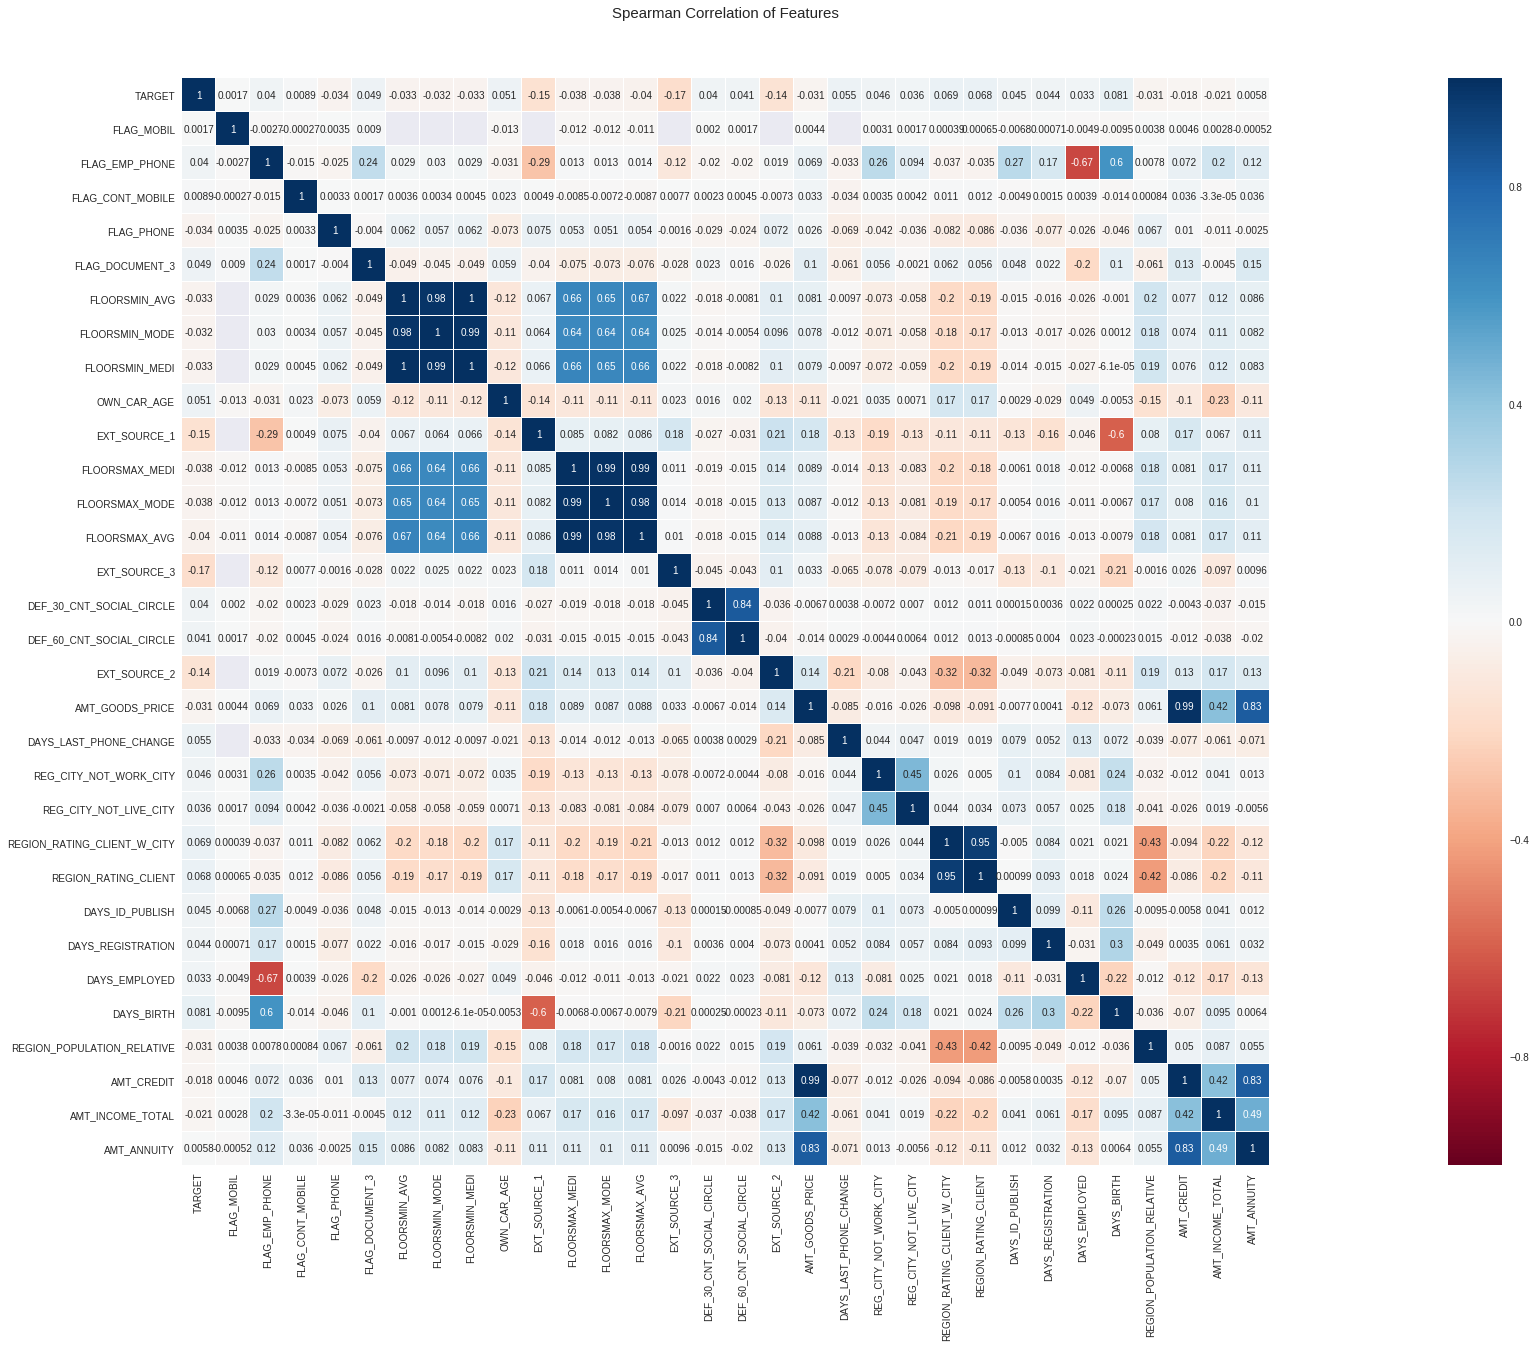

In [23]:
categoricalColumns = appTrain.select_dtypes(exclude=[np.number]).columns.tolist()
remainingNumerics = list(missingAppTrain['Column Name'].unique())

# desiredColumns are those needed for domain-knowledge manual feature engineering that were not
# preserved in the filtering above
desiredColumns = ['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY']

remainingCols = categoricalColumns + remainingNumerics + desiredColumns

# Keep only those columns desired
appTrain = appTrain[remainingCols]

colormap = plt.cm.RdBu
plt.figure(figsize=(64,20))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(appTrain.corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.



### *A diversion to avert mulitcollinearity*

It can be seen from a few of the large blocks of strong color that some of the columns seem to highly correlate with each other (FLOORSMAX_* and FLOORSMIN_*, DEF_30/60_COUNT_SOCIAL_CIRCLE, REG_CITY_NOT_WORK/LIVE_CITY, REGION_RATING_CLIENT/_W_CITY), which could be a source of multicollinearity.  We'll keep one from each of those groups, the one most predictive of TARGET.

In [0]:
# FLOORSMIN_AVG most predictive of TARGET, drop the others
appTrain.drop(columns=['FLOORSMIN_MODE','FLOORSMIN_MEDI'], inplace=True)

# FLOORSMAX_AVG most predictive
appTrain.drop(columns=['FLOORSMAX_MODE','FLOORSMAX_MEDI'], inplace=True)

# DEF_60_CNT_SOCIAL_CIRCLE most predictive
appTrain.drop(columns=['DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True)

# REG_CITY_NOT_WORK_CITY most predictive
appTrain.drop(columns=['REG_CITY_NOT_LIVE_CITY'], inplace=True)

# REGION_RATING_CLIENT_W_CITY most predictive
appTrain.drop(columns=['REGION_RATING_CLIENT'], inplace=True)


Visualize again....

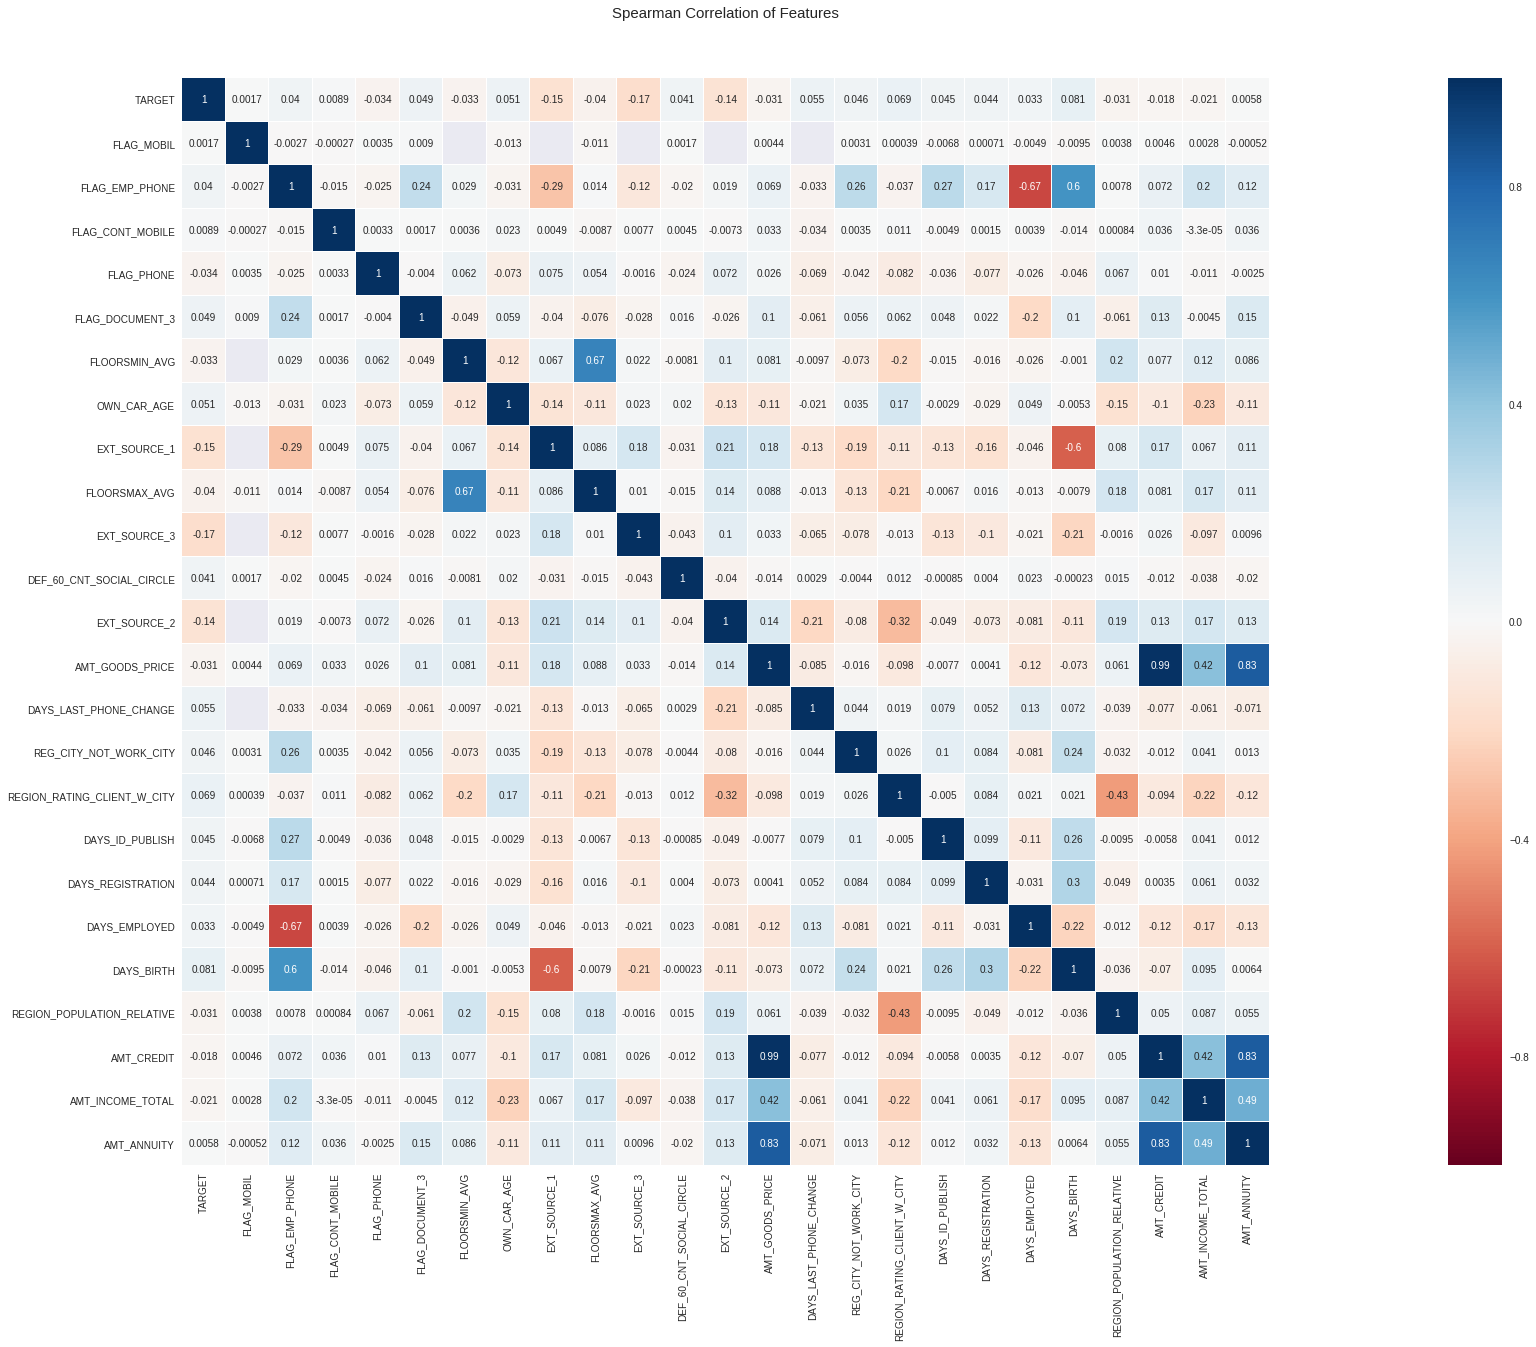

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(64,20))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(appTrain.corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


Much better, now** back to filling in missing values**

In [26]:
missingAppTrain = missingPercentages(appTrain)
nonNormalCols, normalCols = assessNormality(appTrain, appTrain['TARGET'])
appTrainCorrelations = correlations(appTrain[nonNormalCols], appTrain['TARGET'], False)
missingAppTrain = missingAppTrain.merge(appTrainCorrelations, on='Column Name', how='left')
missingAppTrain

Column Name  Missing  Missing Percentage   Pearson  \
0            FONDKAPREMONT_MODE    21090               68.58       NaN   
1                 FLOORSMIN_AVG    20891               67.93 -0.033816   
2                   OWN_CAR_AGE    20260               65.88  0.032614   
3                  EXT_SOURCE_1    17337               56.38 -0.154256   
4            WALLSMATERIAL_MODE    15682               51.00       NaN   
5                HOUSETYPE_MODE    15441               50.21       NaN   
6                 FLOORSMAX_AVG    15294               49.73 -0.037330   
7           EMERGENCYSTATE_MODE    14599               47.47       NaN   
8               OCCUPATION_TYPE     9677               31.47       NaN   
9                  EXT_SOURCE_3     6086               19.79 -0.185112   
10              NAME_TYPE_SUITE      129                0.42       NaN   
11     DEF_60_CNT_SOCIAL_CIRCLE      106                0.34  0.047727   
12                 EXT_SOURCE_2       77                0.25 -0.154070   
13              AMT_GOODS_PRICE       26                0.08 -0.039772   
14            DAYS_REGISTRATION        0                0.00  0.047375   
15              DAYS_ID_PUBLISH        0                0.00  0.045483   
16  REGION_RATING_CLIENT_W_CITY        0                0.00  0.069156   
17       REG_CITY_NOT_WORK_CITY        0                0.00  0.046126   
18                DAYS_EMPLOYED        0                0.00 -0.038694   
19                   DAYS_BIRTH        0                0.00  0.080387   
20   REGION_POPULATION_RELATIVE        0                0.00 -0.038200   
21                   AMT_CREDIT        0                0.00 -0.032371   
22             AMT_INCOME_TOTAL        0                0.00  0.015307   
23       DAYS_LAST_PHONE_CHANGE        1                0.00  0.056664   
24                       TARGET        0                0.00       NaN   
25              FLAG_DOCUMENT_3        0                0.00       NaN   
26           NAME_CONTRACT_TYPE        0                0.00       NaN   
27            ORGANIZATION_TYPE        0                0.00       NaN   
28   WEEKDAY_APPR_PROCESS_START        0                0.00       NaN   
29                   FLAG_PHONE        0                0.00       NaN   
30             FLAG_CONT_MOBILE        0                0.00       NaN   
31               FLAG_EMP_PHONE        0                0.00       NaN   
32                   FLAG_MOBIL        0                0.00       NaN   
33            NAME_HOUSING_TYPE        0                0.00       NaN   
34           NAME_FAMILY_STATUS        0                0.00       NaN   
35          NAME_EDUCATION_TYPE        0                0.00       NaN   
36             NAME_INCOME_TYPE        0                0.00       NaN   
37              FLAG_OWN_REALTY        0                0.00       NaN   
38                 FLAG_OWN_CAR        0                0.00       NaN   
39                  CODE_GENDER        0                0.00       NaN   
40                  AMT_ANNUITY        0                0.00 -0.007212   

    Spearman  
0        NaN  
1  -0.033180  
2   0.050651  
3  -0.150054  
4        NaN  
5        NaN  
6  -0.039955  
7        NaN  
8        NaN  
9  -0.172156  
10       NaN  
11  0.041299  
12 -0.141327  
13 -0.030860  
14  0.044471  
15  0.045445  
16  0.069189  
17  0.046126  
18  0.033344  
19  0.080952  
20 -0.031230  
21 -0.017870  
22 -0.021258  
23  0.055134  
24       NaN  
25       NaN  
26       NaN  
27       NaN  
28       NaN  
29       NaN  
30       NaN  
31       NaN  
32       NaN  
33       NaN  
34       NaN  
35       NaN  
36       NaN  
37       NaN  
38       NaN  
39       NaN  
40  0.005809

## Numeric Imputation with Linear Regression

For the numeric columns with correlations, lets start to impute some of these values.  We'll use a linear regression model to predict the missing values to be a bit more careful than just imputing the mean, median, or 0.

We'll impute the columns with most missing values first, using the columns most highly correlated with them (and that have fewer missing values themselves), so that the predicted value for those columns are more based on actual values.  To make this even more accurate, we'll use a function to recompute the highest correaltions after each round of imputation, to make sure we're accouting for the changing values in each iteration of imputation.


In [0]:
from sklearn.linear_model import LinearRegression

def linRegressImpute(df, trainingColumns, colToPredict):
  
  linreg = LinearRegression()
  
  #copy the training columns from the base df
  data = df[trainingColumns]
  # Can't have missing values, just fill them with median value,
  # can't lin regress those or this practically becomes endless regress
  data = data.fillna(data.median())
  
  # Add the target column
  data[colToPredict] = df[colToPredict]
  
  # Make sure theres anything to even impute
  if (data[data[colToPredict].isnull()].drop(columns=colToPredict).shape[0] != 0) and (data[data[colToPredict].notnull()].drop(columns=colToPredict).shape[0] != 0):
    #Step-1: Split the dataset into groups that do and do not contain the missing values, they'll be test and train, respectively.
    x_train = data[data[colToPredict].notnull()].drop(columns=colToPredict)
    y_train = data[data[colToPredict].notnull()][colToPredict]

    x_test = data[data[colToPredict].isnull()].drop(columns=colToPredict)
    y_test = data[data[colToPredict].isnull()][colToPredict]

    #Step-2: Train the linear regressor
    linreg.fit(x_train, y_train)

    #Step-3: Predict the missing values in the attribute of the test data.
    predicted = linreg.predict(x_test)

    #Step-4: Let’s obtain the complete dataset by combining with the target attribute.
    df[colToPredict][df[colToPredict].isnull()] = predicted
  
  return df

  

In [0]:
def getTopCorrelations(df, column, numCorrs):
  
  # Get the correlations as before, but for the column to be imputed, rather than 'TARGET'
  corrs = correlations(df, df[column], False)
  
  # Sort by the absolute value of the Spearman correlation
  ix = abs(corrs['Spearman']).sort_values(ascending=False).index
  corrs_sorted = corrs.loc[ix]
  
  return list(corrs_sorted['Column Name'])[1:(numCorrs+1)] # most correlated will be itself
  

In [29]:
# Example usage
trainingCols = getTopCorrelations(appTrain, 'OWN_CAR_AGE',7)
trainingCols

['AMT_INCOME_TOTAL',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'FLOORSMIN_AVG',
 'AMT_GOODS_PRICE']

In [30]:
# Save the specific columns used to train each imputation.  These same columns will be used to impute the 
# missing test values (whether they're most appropriate or not for those, its for consistency in manipulation of the data)

trainingColsFLOORSMIN_AVG = getTopCorrelations(appTrain, 'FLOORSMIN_AVG',7)
print("Missing values for {} BEFORE: {}".format('FLOORSMIN_AVG', appTrain['FLOORSMIN_AVG'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsFLOORSMIN_AVG, 'FLOORSMIN_AVG')
print("Missing values for {} AFTER: {}".format('FLOORSMIN_AVG', appTrain['FLOORSMIN_AVG'].isnull().sum()))

trainingColsOWN_CAR_AGE = getTopCorrelations(appTrain, 'OWN_CAR_AGE',7)
print("Missing values for {} BEFORE: {}".format('OWN_CAR_AGE', appTrain['OWN_CAR_AGE'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsOWN_CAR_AGE, 'OWN_CAR_AGE')
print("Missing values for {} AFTER: {}".format('OWN_CAR_AGE', appTrain['OWN_CAR_AGE'].isnull().sum()))

trainingColsEXT_SOURCE_1 = getTopCorrelations(appTrain, 'EXT_SOURCE_1',7)
print("Missing values for {} BEFORE: {}".format('EXT_SOURCE_1', appTrain['EXT_SOURCE_1'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsEXT_SOURCE_1, 'EXT_SOURCE_1')
print("Missing values for {} AFTER: {}".format('EXT_SOURCE_1', appTrain['EXT_SOURCE_1'].isnull().sum()))

trainingColsFLOORSMAX_AVG = getTopCorrelations(appTrain, 'FLOORSMAX_AVG',7)
print("Missing values for {} BEFORE: {}".format('FLOORSMAX_AVG', appTrain['FLOORSMAX_AVG'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsFLOORSMAX_AVG, 'FLOORSMAX_AVG')
print("Missing values for {} AFTER: {}".format('FLOORSMAX_AVG', appTrain['FLOORSMAX_AVG'].isnull().sum()))

trainingColsEXT_SOURCE_3 = getTopCorrelations(appTrain, 'EXT_SOURCE_3',7)
print("Missing values for {} BEFORE: {}".format('EXT_SOURCE_3', appTrain['EXT_SOURCE_3'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsEXT_SOURCE_3, 'EXT_SOURCE_3')
print("Missing values for {} AFTER: {}".format('EXT_SOURCE_3', appTrain['EXT_SOURCE_3'].isnull().sum()))

trainingColsDEF_60 = getTopCorrelations(appTrain, 'DEF_60_CNT_SOCIAL_CIRCLE',7)
print("Missing values for {} BEFORE: {}".format('DEF_60_CNT_SOCIAL_CIRCLE', appTrain['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsDEF_60, 'DEF_60_CNT_SOCIAL_CIRCLE')
print("Missing values for {} AFTER: {}".format('DEF_60_CNT_SOCIAL_CIRCLE', appTrain['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()))

trainingColsEXT_SOURCE_2 = getTopCorrelations(appTrain, 'EXT_SOURCE_2',7)
print("Missing values for {} BEFORE: {}".format('EXT_SOURCE_2', appTrain['EXT_SOURCE_2'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsEXT_SOURCE_2, 'EXT_SOURCE_2')
print("Missing values for {} AFTER: {}".format('EXT_SOURCE_2', appTrain['EXT_SOURCE_2'].isnull().sum()))

trainingColsAMT_GOODS_PRICE = getTopCorrelations(appTrain, 'AMT_GOODS_PRICE',7)
print("Missing values for {} BEFORE: {}".format('AMT_GOODS_PRICE', appTrain['AMT_GOODS_PRICE'].isnull().sum()))
appTrain = linRegressImpute(appTrain, trainingColsAMT_GOODS_PRICE, 'AMT_GOODS_PRICE')
print("Missing values for {} AFTER: {}".format('AMT_GOODS_PRICE', appTrain['AMT_GOODS_PRICE'].isnull().sum()))

Missing values for FLOORSMIN_AVG BEFORE: 20891
Missing values for FLOORSMIN_AVG AFTER: 0
Missing values for OWN_CAR_AGE BEFORE: 20260
Missing values for OWN_CAR_AGE AFTER: 0
Missing values for EXT_SOURCE_1 BEFORE: 17337
Missing values for EXT_SOURCE_1 AFTER: 0
Missing values for FLOORSMAX_AVG BEFORE: 15294
Missing values for FLOORSMAX_AVG AFTER: 0
Missing values for EXT_SOURCE_3 BEFORE: 6086
Missing values for EXT_SOURCE_3 AFTER: 0
Missing values for DEF_60_CNT_SOCIAL_CIRCLE BEFORE: 106
Missing values for DEF_60_CNT_SOCIAL_CIRCLE AFTER: 0
Missing values for EXT_SOURCE_2 BEFORE: 77
Missing values for EXT_SOURCE_2 AFTER: 0
Missing values for AMT_GOODS_PRICE BEFORE: 26
Missing values for AMT_GOODS_PRICE AFTER: 0


For DAYS_LAST_PHONE_CHANGE, with its one missing value, just fill in 0 (assume they never had a phone or something).

In [0]:
appTrain['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

In [32]:
appTrain['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

## Categorical Missing Values and Imputation

In [33]:
appTrainCategoricals = appTrain[categoricalColumns]
missingCategoricals = missingPercentages(appTrainCategoricals,True)

                   Column Name  Missing  Missing Percentage
17          FONDKAPREMONT_MODE    21090               68.58
19          WALLSMATERIAL_MODE    15682               51.00
18              HOUSETYPE_MODE    15441               50.21
20         EMERGENCYSTATE_MODE    14599               47.47
14             OCCUPATION_TYPE     9677               31.47
5              NAME_TYPE_SUITE      129                0.42
0                       TARGET        0                0.00
12            FLAG_CONT_MOBILE        0                0.00
16           ORGANIZATION_TYPE        0                0.00
15  WEEKDAY_APPR_PROCESS_START        0                0.00
13                  FLAG_PHONE        0                0.00
11              FLAG_EMP_PHONE        0                0.00
1           NAME_CONTRACT_TYPE        0                0.00
10                  FLAG_MOBIL        0                0.00
9            NAME_HOUSING_TYPE        0                0.00
8           NAME_FAMILY_STATUS        0 

In [0]:
# Taken from: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
  
def categoricalCorrelation(categoricalDF, targetColumn):
  
  associationDF = pd.DataFrame(columns=['Column Name', 'Association Measure'])
  cols = list(categoricalDF.columns)
  associationMeasures = []
  for col in cols:
    
    associationMeasures.append(cramers_v(categoricalDF[col], targetColumn))
  
  associationDF['Column Name'] = cols
  associationDF['Association Measure'] = associationMeasures
  return  associationDF


    
  


In [35]:
categoricalAssociations = categoricalCorrelation(appTrainCategoricals, appTrain['TARGET'])
missingCategoricals = missingCategoricals.merge(categoricalAssociations, on='Column Name', how='left')
missingCategoricals

Column Name  Missing  Missing Percentage  \
0           FONDKAPREMONT_MODE    21090               68.58   
1           WALLSMATERIAL_MODE    15682               51.00   
2               HOUSETYPE_MODE    15441               50.21   
3          EMERGENCYSTATE_MODE    14599               47.47   
4              OCCUPATION_TYPE     9677               31.47   
5              NAME_TYPE_SUITE      129                0.42   
6                       TARGET        0                0.00   
7             FLAG_CONT_MOBILE        0                0.00   
8            ORGANIZATION_TYPE        0                0.00   
9   WEEKDAY_APPR_PROCESS_START        0                0.00   
10                  FLAG_PHONE        0                0.00   
11              FLAG_EMP_PHONE        0                0.00   
12          NAME_CONTRACT_TYPE        0                0.00   
13                  FLAG_MOBIL        0                0.00   
14           NAME_HOUSING_TYPE        0                0.00   
15          NAME_FAMILY_STATUS        0                0.00   
16         NAME_EDUCATION_TYPE        0                0.00   
17            NAME_INCOME_TYPE        0                0.00   
18             FLAG_OWN_REALTY        0                0.00   
19                FLAG_OWN_CAR        0                0.00   
20                 CODE_GENDER        0                0.00   
21             FLAG_DOCUMENT_3        0                0.00   

    Association Measure  
0              0.000000  
1              0.023211  
2              0.022506  
3              0.001371  
4              0.068704  
5              0.000000  
6              0.999779  
7              0.005125  
8              0.059017  
9              0.000000  
10             0.033338  
11             0.039314  
12             0.040670  
13             0.006728  
14             0.031309  
15             0.045418  
16             0.061618  
17             0.058387  
18             0.003563  
19             0.017850  
20             0.055396  
21             0.048980


Lets drop the columns that don't have at least an association of 0.04.  This covers most of the high missing-value-count columns (except for OCCUPATION TYPE,  which does sound useful).



In [0]:
keptCategoricals = missingCategoricals[missingCategoricals['Association Measure'] >= 0.04]
droppedCategoricals = missingCategoricals[missingCategoricals['Association Measure'] < 0.04]
missingCategoricals = keptCategoricals


In [37]:
list(appTrain['OCCUPATION_TYPE'].unique())

['Laborers',
 'Core staff',
 'Accountants',
 'Managers',
 nan,
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Medicine staff',
 'Security staff',
 'High skill tech staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff']


The OCCUPTATION_TYPE categories seem rather broad, so we might not be in too much trouble to just replace 'nan' with 'UNKNOWN' (rather than 'UNEMPLOYED', as while this is possibly the explanation, thats...unknown), since we're not guessing really specific information.  

In [0]:
appTrain['OCCUPATION_TYPE'] = appTrain['OCCUPATION_TYPE'].cat.add_categories('UNKNOWN')
appTrain['OCCUPATION_TYPE'].fillna('UNKNOWN', inplace=True)

In [39]:
list(appTrain['OCCUPATION_TYPE'].unique())

['Laborers',
 'Core staff',
 'Accountants',
 'Managers',
 'UNKNOWN',
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Medicine staff',
 'Security staff',
 'High skill tech staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff']

### Finalize appTrain, align appTrain and appTest

Set appTrain so that it only contains those columns we have decided to save and impute.

Finally, because everything we do to the Training set we have to do to the testing set, we'll align the testing set with the training set to drop the corresponding columns in the testing set

In [40]:
finalColumns = list(missingCategoricals['Column Name']) + [col for col in list(missingAppTrain['Column Name']) 
                                                          if col not in categoricalColumns]

finalColumns

['OCCUPATION_TYPE',
 'TARGET',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'FLAG_DOCUMENT_3',
 'FLOORSMIN_AVG',
 'OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_ANNUITY']

In [41]:
print("appTrain column count BEFORE final column selection: {}".format(appTrain.shape[1]))
appTrain = appTrain[finalColumns]
print("appTrain column count AFTER final column selection: {}".format(appTrain.shape[1]))


appTrain column count BEFORE final column selection: 41
appTrain column count AFTER final column selection: 28




## One Hot Encode the Categorical Variables


In [42]:
appTrain.dtypes.value_counts()

float32     14
int32        5
bool         2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [43]:
appTrain.select_dtypes('category').apply(pd.Series.nunique, axis = 0)

OCCUPATION_TYPE        19
ORGANIZATION_TYPE      58
NAME_CONTRACT_TYPE      2
NAME_FAMILY_STATUS      5
NAME_EDUCATION_TYPE     5
NAME_INCOME_TYPE        7
CODE_GENDER             2
dtype: int64

In [44]:
appTrain.shape

(30752, 28)

In [0]:
appTrain = pd.get_dummies(appTrain)


# Testing Set from appTrain

Since we are working with a reduced dataset, and not submitting to Kaggle, we'll ignore appTest and generate our own testing set from the Training set.  This set will be treated like the actual testing set - kept seperate, but manipulated in the same manner as the training set to ensure the two sets are structurally similar.

First up, draw them from the training set, non-overlapping with those rows already used.

In [0]:
# the testing set from the training
# As were using 10% of the original training data, we'll use 10% of the orignal testing data
# size, 4870 rows.  Well take these from the 50 000 row onwards, so theres no overlap with the training set
appTestFromTrain = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/reducedDataSet/application_test_from_trained_reduced.csv')

In [47]:
appTestFromTrain.head()

Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       50000      157878       0         Cash loans           M            Y   
1       50001      157879       0    Revolving loans           M            N   
2       50002      157880       0         Cash loans           F            N   
3       50003      157881       0         Cash loans           F            N   
4       50004      157882       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               N             2          247500.0    945000.0   
1               Y             2          180000.0    540000.0   
2               Y             0          112500.0    295168.5   
3               Y             0           63000.0    298512.0   
4               Y             0           67500.0    640080.0   

              ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             ...                             0                 0   
1             ...                             0                 0   
2             ...                             0                 0   
3             ...                             0                 0   
4             ...                             0                 0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        1.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        NaN                        NaN   
4                        1.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         2.0  
1                         3.0  
2                         1.0  
3                         NaN  
4                         2.0  

[5 rows x 123 columns]

In [0]:
appTestFromTrain.drop(appTestFromTrain.columns[0], axis=1, inplace=True)

In [0]:
appTestFromTrain.set_index('SK_ID_CURR', inplace=True)

Save the testing labels from the dataframe, save them to a csv for later use, and then drop them from the table.  appTestFromTrain for all intents and purposes is the testing set now.

In [0]:
testingLabels = appTestFromTrain['TARGET']
testingLabels.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/testing_labels.csv')
appTestFromTrain.drop(columns=['TARGET'], inplace=True)

From here, do to this set exactly what was done to appTrain above.

In [0]:
appTestFromTrain = reduce_memory(appTestFromTrain)

Make sure it doesn't have an Unnamed: 0 column to drop:

In [55]:
appTestFromTrain.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
157878             Cash loans           M            Y               N   
157879        Revolving loans           M            N               Y   
157880             Cash loans           F            N               Y   
157881             Cash loans           F            N               Y   
157882             Cash loans           F            N               Y   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
157878                 2          247500.0    945000.0      40167.0   
157879                 2          180000.0    540000.0      27000.0   
157880                 0          112500.0    295168.5      16011.0   
157881                 0           63000.0    298512.0      17266.5   
157882                 0           67500.0    640080.0      24259.5   

            AMT_GOODS_PRICE NAME_TYPE_SUITE             ...              \
SK_ID_CURR                                              ...               
157878             945000.0   Unaccompanied             ...               
157879             540000.0   Unaccompanied             ...               
157880             238500.0   Unaccompanied             ...               
157881             270000.0   Unaccompanied             ...               
157882             450000.0   Unaccompanied             ...               

           FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
SK_ID_CURR                                                      
157878                    0                0                0   
157879                    0                0                0   
157880                    0                0                0   
157881                    0                0                0   
157882                    0                0                0   

           FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
SK_ID_CURR                                                
157878                    0                         0.0   
157879                    0                         0.0   
157880                    0                         0.0   
157881                    0                         NaN   
157882                    0                         0.0   

            AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
SK_ID_CURR                                                          
157878                            0.0                         0.0   
157879                            0.0                         0.0   
157880                            0.0                         0.0   
157881                            NaN                         NaN   
157882                            0.0                         0.0   

            AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
SK_ID_CURR                                                         
157878                            0.0                        1.0   
157879                            0.0                        0.0   
157880                            0.0                        1.0   
157881                            NaN                        NaN   
157882                            1.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                              
157878                             2.0  
157879                             3.0  
157880                             1.0  
157881                             NaN  
157882                             2.0  

[5 rows x 120 columns]

Keep only those rows saved in missingAppTrain

In [0]:
missingAppTrain_MinusTARGET = [col for col in list(missingAppTrain['Column Name']) if col != 'TARGET']
appTestFromTrain = appTestFromTrain[missingAppTrain_MinusTARGET]

Impute using the same columns as appTrain

In [0]:
appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsFLOORSMIN_AVG, 'FLOORSMIN_AVG')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsOWN_CAR_AGE, 'OWN_CAR_AGE')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsEXT_SOURCE_1, 'EXT_SOURCE_1')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsFLOORSMAX_AVG, 'FLOORSMAX_AVG')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsEXT_SOURCE_3, 'EXT_SOURCE_3')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsDEF_60, 'DEF_60_CNT_SOCIAL_CIRCLE')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsEXT_SOURCE_2, 'EXT_SOURCE_2')

appTestFromTrain = linRegressImpute(appTestFromTrain, trainingColsAMT_GOODS_PRICE, 'AMT_GOODS_PRICE')


In [58]:
appTestFromTrain['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

Are there any other numeric missing values though?

In [59]:
appTestFromTrainMissing = missingPercentages(appTestFromTrain, True)

                    Column Name  Missing  Missing Percentage
0            FONDKAPREMONT_MODE     3315               68.06
4            WALLSMATERIAL_MODE     2453               50.36
5                HOUSETYPE_MODE     2416               49.60
7           EMERGENCYSTATE_MODE     2299               47.20
8               OCCUPATION_TYPE     1534               31.49
10              NAME_TYPE_SUITE       19                0.39
39                  AMT_ANNUITY        2                0.04
6                 FLOORSMAX_AVG        0                0.00
24              FLAG_DOCUMENT_3        0                0.00
38                  CODE_GENDER        0                0.00
37                 FLAG_OWN_CAR        0                0.00
36              FLAG_OWN_REALTY        0                0.00
35             NAME_INCOME_TYPE        0                0.00
34          NAME_EDUCATION_TYPE        0                0.00
33           NAME_FAMILY_STATUS        0                0.00
32            NAME_HOUSI

In [60]:
appTestFromTrain.dtypes

FONDKAPREMONT_MODE             category
FLOORSMIN_AVG                   float32
OWN_CAR_AGE                     float32
EXT_SOURCE_1                    float32
WALLSMATERIAL_MODE             category
HOUSETYPE_MODE                 category
FLOORSMAX_AVG                   float32
EMERGENCYSTATE_MODE            category
OCCUPATION_TYPE                category
EXT_SOURCE_3                    float32
NAME_TYPE_SUITE                category
DEF_60_CNT_SOCIAL_CIRCLE        float32
EXT_SOURCE_2                    float32
AMT_GOODS_PRICE                 float32
DAYS_REGISTRATION               float32
DAYS_ID_PUBLISH                   int32
REGION_RATING_CLIENT_W_CITY       int32
REG_CITY_NOT_WORK_CITY            int32
DAYS_EMPLOYED                     int32
DAYS_BIRTH                        int32
REGION_POPULATION_RELATIVE      float32
AMT_CREDIT                      float32
AMT_INCOME_TOTAL                float32
DAYS_LAST_PHONE_CHANGE          float32
FLAG_DOCUMENT_3                   int32


Of these, the only numeric left with missing values is AMT_ANNUITY, and its only 2 rows. I'm just going to drop those, as they're 0.02% of the testing set.

In [0]:
appTestFromTrain['AMT_ANNUITY'].dropna(axis=0, inplace=True)

We'll reduce to the final columns first, and then fill in the OCCUPATION_TYPE and NAME_TYPE_SUITE as we did with appTrain.

In [0]:
finalColumns_MinusTARGET = [col for col in finalColumns if col != 'TARGET']
appTestFromTrain = appTestFromTrain[finalColumns_MinusTARGET]

In [0]:
appTestFromTrain['OCCUPATION_TYPE'] = appTestFromTrain['OCCUPATION_TYPE'].cat.add_categories('UNKNOWN')
appTestFromTrain['OCCUPATION_TYPE'].fillna('UNKNOWN', inplace=True)

Finally, One Hot Encode the columns, and then align it with appTrain in case theres any discrepencies in columns.

In [0]:
appTestFromTrain = pd.get_dummies(appTestFromTrain)

In [65]:
appTestFromTrain.head()

FLAG_DOCUMENT_3  FLOORSMIN_AVG  OWN_CAR_AGE  EXT_SOURCE_1  \
SK_ID_CURR                                                              
157878                    0       0.167932     6.000000      0.342195   
157879                    0       0.311685    13.659824      0.076905   
157880                    1       0.083300    13.662455      0.391924   
157881                    1       0.170275    14.924050      0.678117   
157882                    1       0.071557    14.072593      0.511578   

            FLOORSMAX_AVG  EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                          
157878           0.192155      0.622922                       2.0   
157879           0.333300      0.656158                       0.0   
157880           0.041700      0.524496                       0.0   
157881           0.170080      0.546555                       0.0   
157882           0.041700      0.454321                       4.0   

            EXT_SOURCE_2  AMT_GOODS_PRICE  DAYS_REGISTRATION      ...        \
SK_ID_CURR                                                        ...         
157878          0.623227         945000.0            -7733.0      ...         
157879          0.430050         540000.0             -953.0      ...         
157880          0.447755         238500.0            -1193.0      ...         
157881          0.235904         270000.0            -2536.0      ...         
157882          0.615054         450000.0            -3880.0      ...         

            NAME_EDUCATION_TYPE_Higher education  \
SK_ID_CURR                                         
157878                                         0   
157879                                         0   
157880                                         1   
157881                                         0   
157882                                         0   

            NAME_EDUCATION_TYPE_Incomplete higher  \
SK_ID_CURR                                          
157878                                          0   
157879                                          0   
157880                                          0   
157881                                          0   
157882                                          0   

            NAME_EDUCATION_TYPE_Lower secondary  \
SK_ID_CURR                                        
157878                                        0   
157879                                        0   
157880                                        0   
157881                                        0   
157882                                        0   

            NAME_EDUCATION_TYPE_Secondary / secondary special  \
SK_ID_CURR                                                      
157878                                                      1   
157879                                                      1   
157880                                                      0   
157881                                                      1   
157882                                                      1   

            NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Pensioner  \
SK_ID_CURR                                                                      
157878                                          0                           1   
157879                                          0                           0   
157880                                          0                           0   
157881                                          0                           1   
157882                                          0                           0   

            NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
SK_ID_CURR                                                             
157878                                   0                         0   
157879                                   0                         1   
157880                                   0             

In [66]:
print("Dimensions of appTrain: {}".format(appTrain.shape))
print("Dimensions of appTestFromTrain: {}".format(appTestFromTrain.shape))

Dimensions of appTrain: (30752, 119)
Dimensions of appTestFromTrain: (4871, 113)


In [0]:
trainingLabels = appTrain['TARGET']
appTrain, appTestFromTrain = appTrain.align(appTestFromTrain, join='inner', axis=1)
appTrain['TARGET'] = trainingLabels

Save both to CSV

In [0]:
appTrain.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/application_train_prepared.csv')
appTestFromTrain.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/application_test_from_train_prepared.csv')

# Bureau

Lets look at the missing values:

In [69]:
missingBureau = missingPercentages(bureau, True)

               Column Name  Missing  Missing Percentage
17             AMT_ANNUITY   130805               77.17
9   AMT_CREDIT_MAX_OVERDUE   109450               64.57
8        DAYS_ENDDATE_FACT    62978               37.15
13    AMT_CREDIT_SUM_LIMIT    56613               33.40
12     AMT_CREDIT_SUM_DEBT    26259               15.49
7      DAYS_CREDIT_ENDDATE    10059                5.93
2             SK_ID_BUREAU        0                0.00
3            CREDIT_ACTIVE        0                0.00
4          CREDIT_CURRENCY        0                0.00
5              DAYS_CREDIT        0                0.00
6       CREDIT_DAY_OVERDUE        0                0.00
1               SK_ID_CURR        0                0.00
10      CNT_CREDIT_PROLONG        0                0.00
11          AMT_CREDIT_SUM        0                0.00
14  AMT_CREDIT_SUM_OVERDUE        0                0.00
15             CREDIT_TYPE        0                0.00
16      DAYS_CREDIT_UPDATE        0             

In [70]:
bureau.head()

Unnamed: 0  SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
0           0      100002       6158904        Closed      currency 1   
1           1      100002       6158905        Closed      currency 1   
2           2      100002       6158906        Closed      currency 1   
3           3      100002       6158907        Closed      currency 1   
4           4      100002       6158908        Closed      currency 1   

   DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0        -1125                   0              -1038.0            -1038.0   
1         -476                   0                  NaN              -48.0   
2        -1437                   0              -1072.0            -1185.0   
3        -1121                   0               -911.0             -911.0   
4         -645                   0                 85.0              -36.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         40761.0   
1                     NaN                   0             0.0   
2                 0.00000                   0        135000.0   
3              3321.00000                   0         19071.0   
4              5043.64502                   0        120735.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  NaN                   NaN                     0.0   
1                  0.0                   NaN                     0.0   
2                  0.0                   0.0                     0.0   
3                  NaN                   NaN                     0.0   
4                  0.0                   0.0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0      Credit card               -1038          0.0  
1      Credit card                 -47          NaN  
2  Consumer credit               -1185          0.0  
3  Consumer credit                -906          0.0  
4  Consumer credit                 -34          0.0

In [0]:
# Get rid of Unnamed: 0 column
bureau.drop(bureau.columns[0], axis=1, inplace=True)

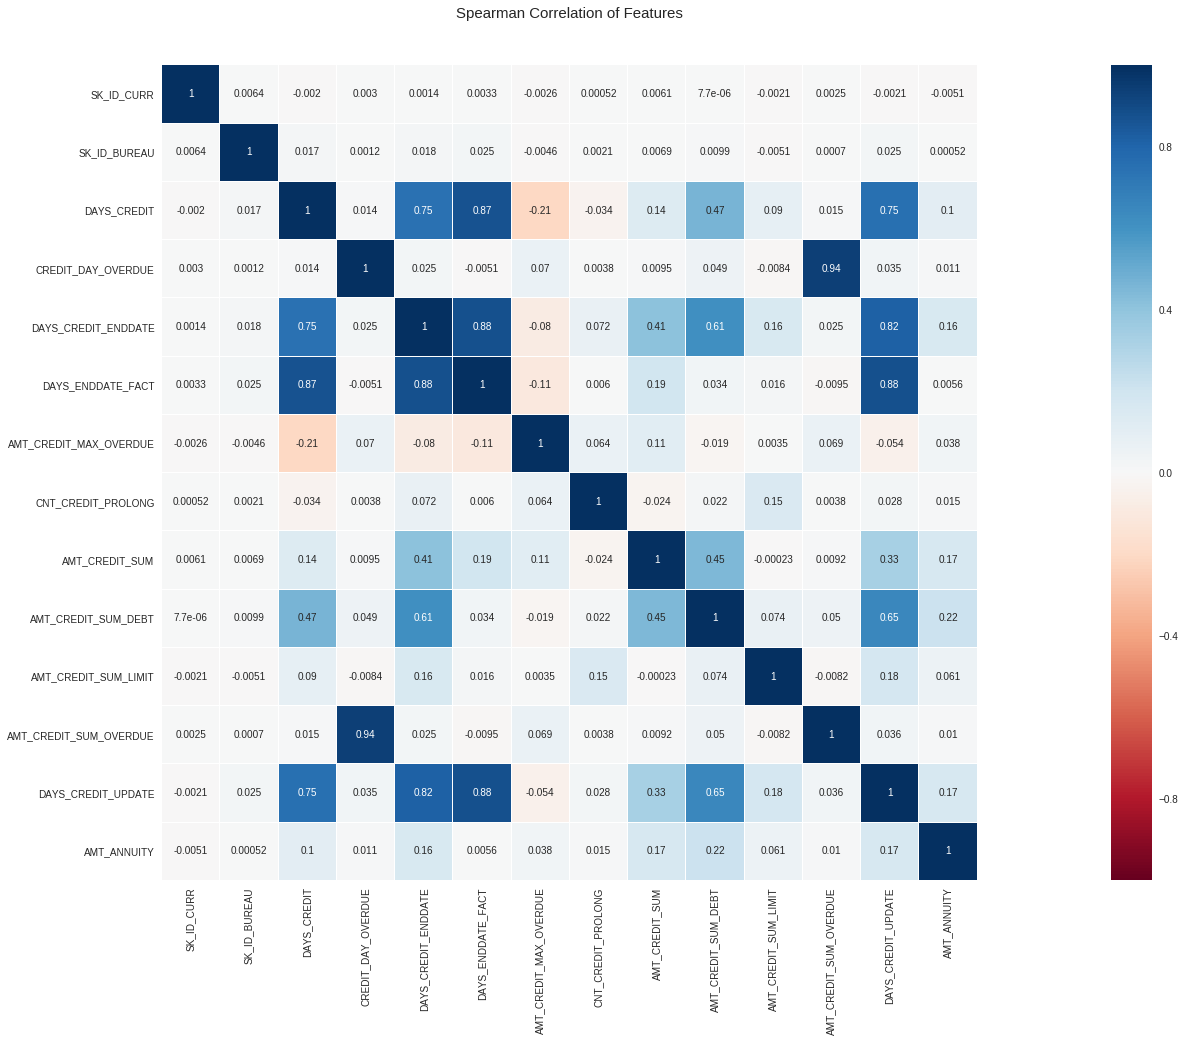

In [72]:
colormap = plt.cm.RdBu
plt.figure(figsize=(48,15))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(bureau.corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

There are a lot fewer columns overall, and only 6 with missing values.  Also, luckily for us, the missing values are all in numeric columns, and the columns seem to be strongly intercorrelated, and thus good candidates for linear regression imputation.

Contrary to what was done above, I'll start with DAYS_CREDIT_ENDDATE, as it has only 6% missing values and has strong correlations with other columns.  Crucially, though, those other columns for the most part have no missing values themselves, and should make for more reliable predictors.

### DAYS_CREDIT_ENDDATE

The column description says: *Remaining duration of CB credit (in days) at the time of application in Home Credit*



In [73]:
bureau['DAYS_CREDIT_ENDDATE'].describe()

count    159443.000000
mean        499.664246
std        4979.396973
min      -42013.000000
25%       -1143.000000
50%        -331.000000
75%         473.000000
max       31198.000000
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [0]:
trainingColumns = ['DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT','DAYS_CREDIT_UPDATE']
bureau = linRegressImpute(bureau, trainingColumns, 'DAYS_CREDIT_ENDDATE')

### AMT_CREDIT_SUM_DEBT

Now lets do the same for AMT_CREDIT_SUM_DEBT, which is a good candidate for impuation for the same reasons DAYS_CREDIT_ENDDATE was.

In [75]:
bureau['AMT_CREDIT_SUM_DEBT'].describe()

count    1.432430e+05
mean     1.381028e+05
std      6.646970e+05
min     -2.014754e+06
25%      0.000000e+00
50%      0.000000e+00
75%      4.021335e+04
max      5.136516e+07
Name: AMT_CREDIT_SUM_DEBT, dtype: float64

In [0]:
trainingColumns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM','DAYS_CREDIT_UPDATE']
bureau = linRegressImpute(bureau, trainingColumns, 'AMT_CREDIT_SUM_DEBT')

AMT_CREDIT_SUM_LIMIT doesn't correlate too strongly with any of the columns, so we'll skip it for now.  DAYS_ENDDATE_FACT does, however, and it correlated quite strongly with DAYS_CREDIT_ENDDATE. Lets see if that still holds:

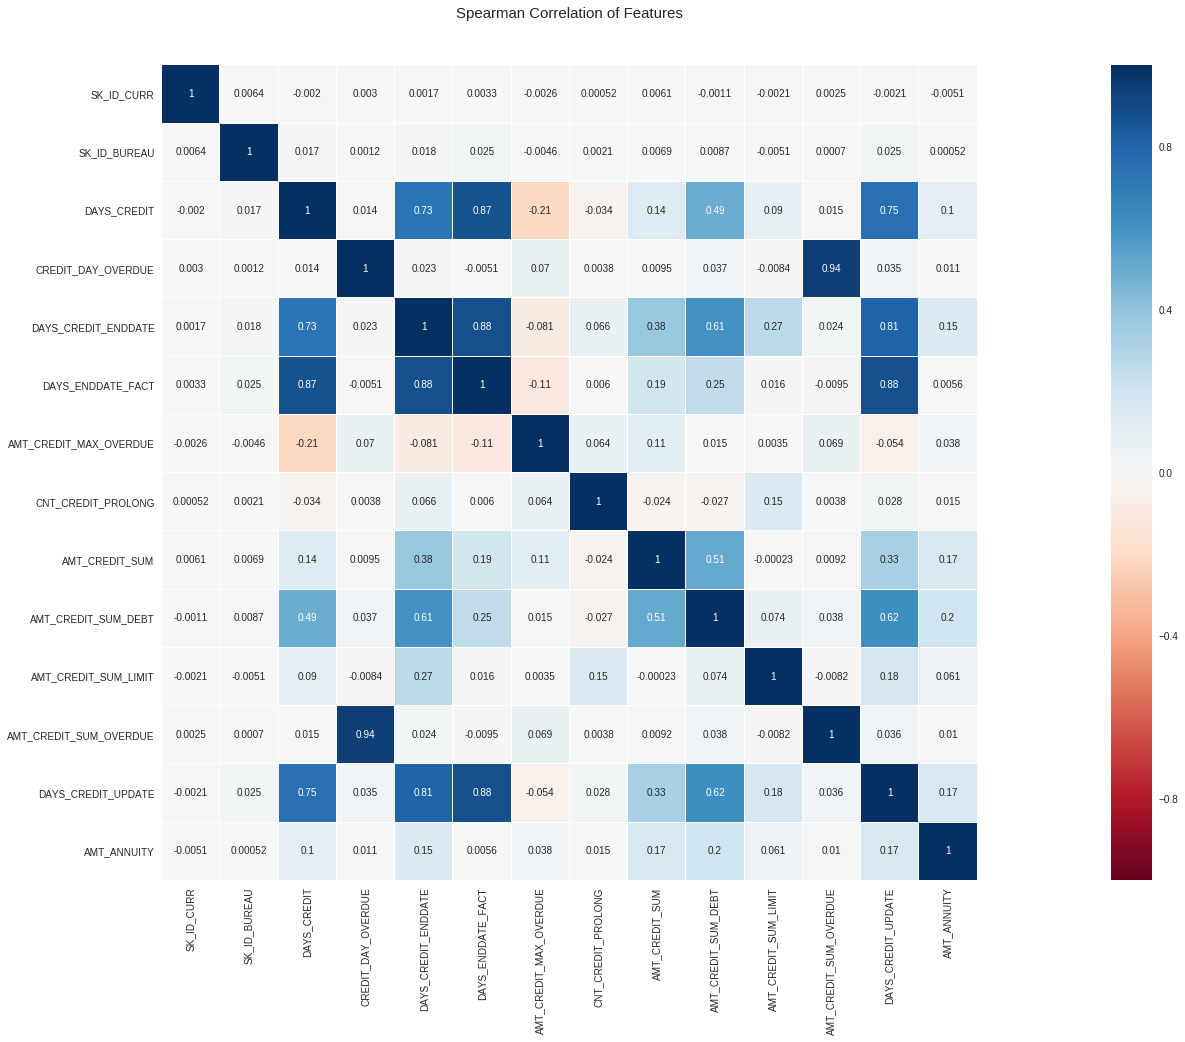

In [77]:
colormap = plt.cm.RdBu
plt.figure(figsize=(48,15))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(bureau.corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

It does, so lets figure it out.

### DAYS_ENDDATE_FACT

In [0]:
trainingColumns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','DAYS_CREDIT_UPDATE']
bureau = linRegressImpute(bureau, trainingColumns, 'DAYS_ENDDATE_FACT')

### AMT_CREDIT_MAX_OVERDUE



In [0]:
trainingColumns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT','AMT_CREDIT_SUM','CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
bureau = linRegressImpute(bureau, trainingColumns, 'AMT_CREDIT_MAX_OVERDUE')

### AMT_CREDIT_SUM_LIMIT

In [0]:
trainingColumns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT','CNT_CREDIT_PROLONG', 'DAYS_CREDIT_UPDATE']
bureau = linRegressImpute(bureau, trainingColumns, 'AMT_CREDIT_SUM_LIMIT')

### AMT_ANNUITY

Saving the biggest for last.  Hopefully now that the other values are imputed, it can be filled in relatively accurately, given that it is a factor in a few manually engineered features.

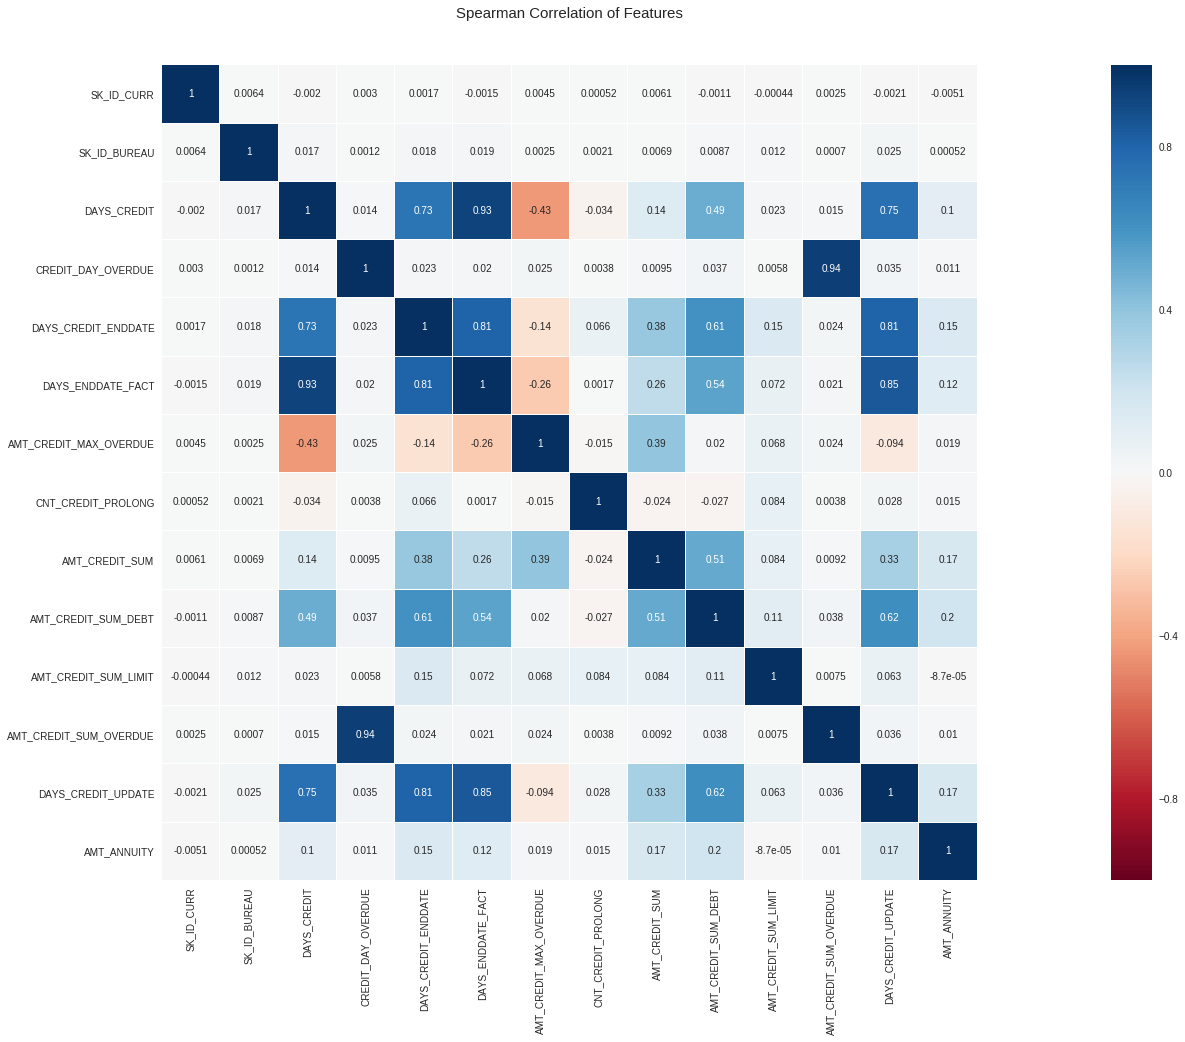

In [81]:
colormap = plt.cm.RdBu
plt.figure(figsize=(48,15))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(bureau.corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
trainingColumns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','DAYS_CREDIT_UPDATE']
bureau = linRegressImpute(bureau, trainingColumns, 'AMT_ANNUITY')

In [84]:
missingBureau = missingPercentages(bureau, True)

               Column Name  Missing  Missing Percentage
0               SK_ID_CURR        0                 0.0
9       CNT_CREDIT_PROLONG        0                 0.0
15      DAYS_CREDIT_UPDATE        0                 0.0
14             CREDIT_TYPE        0                 0.0
13  AMT_CREDIT_SUM_OVERDUE        0                 0.0
12    AMT_CREDIT_SUM_LIMIT        0                 0.0
11     AMT_CREDIT_SUM_DEBT        0                 0.0
10          AMT_CREDIT_SUM        0                 0.0
8   AMT_CREDIT_MAX_OVERDUE        0                 0.0
1             SK_ID_BUREAU        0                 0.0
7        DAYS_ENDDATE_FACT        0                 0.0
6      DAYS_CREDIT_ENDDATE        0                 0.0
5       CREDIT_DAY_OVERDUE        0                 0.0
4              DAYS_CREDIT        0                 0.0
3          CREDIT_CURRENCY        0                 0.0
2            CREDIT_ACTIVE        0                 0.0
16             AMT_ANNUITY        0             

## One Hot Encode the categoricals and were all set for Bureau...

In [85]:
print("Number of columns in bureau BEFORE OHE: {}".format(bureau.shape[1]))
bureau = pd.get_dummies(bureau)
print("Number of columns in bureau AFTER OHE: {}".format(bureau.shape[1]))


Number of columns in bureau BEFORE OHE: 17
Number of columns in bureau AFTER OHE: 34


In [0]:
bureau.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/bureau_prepared.csv')

# bureauBalance

In [87]:
bureauBalanceMissing = missingPercentages(bureauBalance, True)

      Column Name  Missing  Missing Percentage
0      Unnamed: 0        0                 0.0
1    SK_ID_BUREAU        0                 0.0
2  MONTHS_BALANCE        0                 0.0
3          STATUS        0                 0.0


Awesome, no missing values!

In [88]:
bureauBalance.head()

Unnamed: 0  SK_ID_BUREAU  MONTHS_BALANCE STATUS
0           0       5008833             -41      C
1           1       5008833             -70      C
2           2       5008833             -71      C
3           3       5008833             -72      C
4           4       5008833             -73      C

In [89]:
list(bureauBalance['STATUS'].unique())

['C', '0', 'X', '1', '5', '2', '3', '4']

In [0]:
bureauBalance = pd.get_dummies(bureauBalance)

In [0]:
# Get rid of Unnamed: 0
bureauBalance.drop(bureauBalance.columns[0], axis=1, inplace=True)

In [0]:
bureauBalance.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/bureau_balance_prepared.csv')

# previousApplication

In [93]:
prevAppsMissing = missingPercentages(prevApps, True)

                    Column Name  Missing  Missing Percentage
15     RATE_INTEREST_PRIVILEGED   162751               99.66
14        RATE_INTEREST_PRIMARY   162751               99.66
7              AMT_DOWN_PAYMENT    86764               53.13
13            RATE_DOWN_PAYMENT    86764               53.13
21              NAME_TYPE_SUITE    80484               49.28
32           DAYS_FIRST_DRAWING    64955               39.77
37    NFLAG_INSURED_ON_APPROVAL    64955               39.77
33               DAYS_FIRST_DUE    64955               39.77
34    DAYS_LAST_DUE_1ST_VERSION    64955               39.77
35                DAYS_LAST_DUE    64955               39.77
36             DAYS_TERMINATION    64955               39.77
8               AMT_GOODS_PRICE    36760               22.51
29                  CNT_PAYMENT    35533               21.76
4                   AMT_ANNUITY    35533               21.76
31          PRODUCT_COMBINATION       39                0.02
23          NAME_GOODS_C

I'm going to go out on a limb and say that any feature that has 99+% missing values is not likely to be too predictive or missed by out model. I'm just going to drop those right off the bat.

In [0]:
prevApps.drop(columns=['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'], inplace=True)

In [95]:
prevApps.dtypes

Unnamed: 0                        int32
SK_ID_PREV                        int32
SK_ID_CURR                        int32
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float32
AMT_APPLICATION                 float32
AMT_CREDIT                      float32
AMT_DOWN_PAYMENT                float32
AMT_GOODS_PRICE                 float32
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int32
FLAG_LAST_APPL_PER_CONTRACT    category
NFLAG_LAST_APPL_IN_DAY             bool
RATE_DOWN_PAYMENT               float32
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int32
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_TYPE_SUITE                category
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category
CHANNEL_TYPE                   category


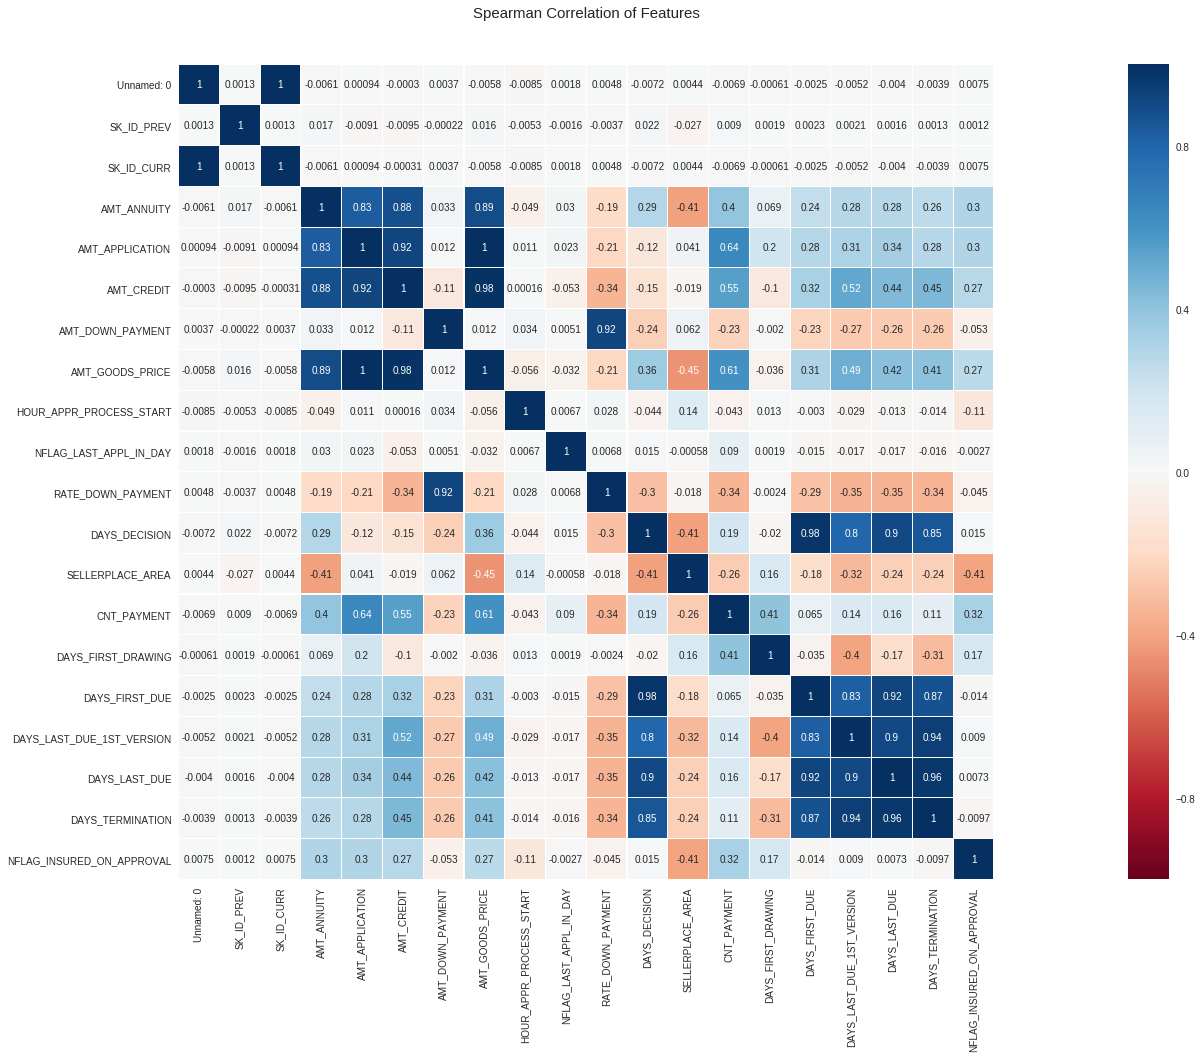

In [96]:
colormap = plt.cm.RdBu
plt.figure(figsize=(48,15))
plt.title('Spearman Correlation of Features', y=1.05, size=15)

sns.heatmap(prevApps.corr(method='spearman'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
prevAppsGrouped = prevApps.groupby('SK_ID_CURR')

Besides the first two, the rest of the numeric columns with missing values have relatively similar percentages of them.  A significant number of the numeric columns contain missing values, and the correlation heatmap shows theres no obvious starting points.  Thus, I'm going to automate the process of selecting traing columns for imputation as i did in appTrain.

In [98]:
trainingCols = getTopCorrelations(prevApps, 'AMT_DOWN_PAYMENT',7)
print("Missing values for {} BEFORE: {}".format('AMT_DOWN_PAYMENT', prevApps['AMT_DOWN_PAYMENT'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'AMT_DOWN_PAYMENT')
print("Missing values for {} AFTER: {}".format('AMT_DOWN_PAYMENT', prevApps['AMT_DOWN_PAYMENT'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'RATE_DOWN_PAYMENT',7)
print("Missing values for {} BEFORE: {}".format('RATE_DOWN_PAYMENT', prevApps['RATE_DOWN_PAYMENT'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'RATE_DOWN_PAYMENT')
print("Missing values for {} AFTER: {}".format('RATE_DOWN_PAYMENT', prevApps['RATE_DOWN_PAYMENT'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'DAYS_FIRST_DRAWING',7)
print("Missing values for {} BEFORE: {}".format('DAYS_FIRST_DRAWING', prevApps['DAYS_FIRST_DRAWING'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'DAYS_FIRST_DRAWING')
print("Missing values for {} AFTER: {}".format('DAYS_FIRST_DRAWING', prevApps['DAYS_FIRST_DRAWING'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'NFLAG_INSURED_ON_APPROVAL',7)
print("Missing values for {} BEFORE: {}".format('NFLAG_INSURED_ON_APPROVAL', prevApps['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'NFLAG_INSURED_ON_APPROVAL')
print("Missing values for {} AFTER: {}".format('NFLAG_INSURED_ON_APPROVAL', prevApps['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'DAYS_FIRST_DUE',7)
print("Missing values for {} BEFORE: {}".format('DAYS_FIRST_DUE', prevApps['DAYS_FIRST_DUE'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'DAYS_FIRST_DUE')
print("Missing values for {} AFTER: {}".format('DAYS_FIRST_DUE', prevApps['DAYS_FIRST_DUE'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'DAYS_LAST_DUE_1ST_VERSION',7)
print("Missing values for {} BEFORE: {}".format('DAYS_LAST_DUE_1ST_VERSION', prevApps['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'DAYS_LAST_DUE_1ST_VERSION')
print("Missing values for {} AFTER: {}".format('DAYS_LAST_DUE_1ST_VERSION', prevApps['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'DAYS_LAST_DUE',7)
print("Missing values for {} BEFORE: {}".format('DAYS_LAST_DUE', prevApps['DAYS_LAST_DUE'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'DAYS_LAST_DUE')
print("Missing values for {} AFTER: {}".format('DAYS_LAST_DUE', prevApps['DAYS_LAST_DUE'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'DAYS_TERMINATION',7)
print("Missing values for {} BEFORE: {}".format('DAYS_TERMINATION', prevApps['DAYS_TERMINATION'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'DAYS_TERMINATION')
print("Missing values for {} AFTER: {}".format('DAYS_TERMINATION', prevApps['DAYS_TERMINATION'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'AMT_GOODS_PRICE',7)
print("Missing values for {} BEFORE: {}".format('AMT_GOODS_PRICE', prevApps['AMT_GOODS_PRICE'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'AMT_GOODS_PRICE')
print("Missing values for {} AFTER: {}".format('AMT_GOODS_PRICE', prevApps['AMT_GOODS_PRICE'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'CNT_PAYMENT',7)
print("Missing values for {} BEFORE: {}".format('CNT_PAYMENT', prevApps['CNT_PAYMENT'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'CNT_PAYMENT')
print("Missing values for {} AFTER: {}".format('CNT_PAYMENT', prevApps['CNT_PAYMENT'].isnull().sum()))

trainingCols = getTopCorrelations(prevApps, 'AMT_ANNUITY',7)
print("Missing values for {} BEFORE: {}".format('AMT_ANNUITY', prevApps['AMT_ANNUITY'].isnull().sum()))
prevApps = linRegressImpute(prevApps, trainingCols, 'AMT_ANNUITY')
print("Missing values for {} AFTER: {}".format('AMT_ANNUITY', prevApps['AMT_ANNUITY'].isnull().sum()))

Missing values for AMT_DOWN_PAYMENT BEFORE: 86764
Missing values for AMT_DOWN_PAYMENT AFTER: 0
Missing values for RATE_DOWN_PAYMENT BEFORE: 86764
Missing values for RATE_DOWN_PAYMENT AFTER: 0
Missing values for DAYS_FIRST_DRAWING BEFORE: 64955
Missing values for DAYS_FIRST_DRAWING AFTER: 0
Missing values for NFLAG_INSURED_ON_APPROVAL BEFORE: 64955
Missing values for NFLAG_INSURED_ON_APPROVAL AFTER: 0
Missing values for DAYS_FIRST_DUE BEFORE: 64955
Missing values for DAYS_FIRST_DUE AFTER: 0
Missing values for DAYS_LAST_DUE_1ST_VERSION BEFORE: 64955
Missing values for DAYS_LAST_DUE_1ST_VERSION AFTER: 0
Missing values for DAYS_LAST_DUE BEFORE: 64955
Missing values for DAYS_LAST_DUE AFTER: 0
Missing values for DAYS_TERMINATION BEFORE: 64955
Missing values for DAYS_TERMINATION AFTER: 0
Missing values for AMT_GOODS_PRICE BEFORE: 36760
Missing values for AMT_GOODS_PRICE AFTER: 0
Missing values for CNT_PAYMENT BEFORE: 35533
Missing values for CNT_PAYMENT AFTER: 0
Missing values for AMT_ANNUITY

### Categorical Missing Values

> **NAME_TYPE_SUITE**: *Who accompanied client when applying for the previous application*



In [99]:
list(prevApps['NAME_TYPE_SUITE'].unique())

[nan,
 'Unaccompanied',
 'Family',
 'Spouse, partner',
 'Children',
 'Other_A',
 'Other_B',
 'Group of people']

We'll just rename this as unknown.

In [0]:
prevApps['NAME_TYPE_SUITE'] = prevApps['NAME_TYPE_SUITE'].cat.add_categories('UNKNOWN')
prevApps['NAME_TYPE_SUITE'].fillna('UNKNOWN', inplace=True)

> **PRODUCE_COMBINATION**: *Detailed product combination of the previous application*

In [101]:
list(prevApps['PRODUCT_COMBINATION'].unique())

['POS other with interest',
 'Cash X-Sell: low',
 'POS industry with interest',
 'POS household with interest',
 'POS mobile without interest',
 'Cash',
 'Cash X-Sell: high',
 'Card X-Sell',
 'Card Street',
 'Cash X-Sell: middle',
 'POS mobile with interest',
 'Cash Street: high',
 'POS household without interest',
 'POS industry without interest',
 'Cash Street: low',
 'Cash Street: middle',
 'POS others without interest',
 nan]

There doesn't look like a good way to intelligently impute these values, besides another machine learning model on them.  As theres only 33 missing values though, we'll once again plug in UNKNOWN and call it a day.

In [0]:
prevApps['PRODUCT_COMBINATION'] = prevApps['PRODUCT_COMBINATION'].cat.add_categories('UNKNOWN')
prevApps['PRODUCT_COMBINATION'].fillna('UNKNOWN', inplace=True)

In [103]:
prevAppsMissing = missingPercentages(prevApps, True)

                    Column Name  Missing  Missing Percentage
0                    Unnamed: 0        0                 0.0
1                    SK_ID_PREV        0                 0.0
20             NAME_CLIENT_TYPE        0                 0.0
21          NAME_GOODS_CATEGORY        0                 0.0
22               NAME_PORTFOLIO        0                 0.0
23            NAME_PRODUCT_TYPE        0                 0.0
24                 CHANNEL_TYPE        0                 0.0
25             SELLERPLACE_AREA        0                 0.0
26         NAME_SELLER_INDUSTRY        0                 0.0
27                  CNT_PAYMENT        0                 0.0
28             NAME_YIELD_GROUP        0                 0.0
29          PRODUCT_COMBINATION        0                 0.0
30           DAYS_FIRST_DRAWING        0                 0.0
31               DAYS_FIRST_DUE        0                 0.0
32    DAYS_LAST_DUE_1ST_VERSION        0                 0.0
33                DAYS_L

**One Hot Encode and Save**

In [0]:
prevApps = pd.get_dummies(prevApps)


In [0]:
# drop Unnamed: 0
prevApps.drop(prevApps.columns[0], axis=1, inplace=True)

In [0]:
prevApps.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/previous_applications_prepared.csv')

# POS Cash Balance

In [107]:
POSCashMissing = missingPercentages(POSCash, True)

             Column Name  Missing  Missing Percentage
4         CNT_INSTALMENT     2191                0.27
5  CNT_INSTALMENT_FUTURE     2194                0.27
0             Unnamed: 0        0                0.00
1             SK_ID_PREV        0                0.00
2             SK_ID_CURR        0                0.00
3         MONTHS_BALANCE        0                0.00
6   NAME_CONTRACT_STATUS        0                0.00
7                 SK_DPD        0                0.00
8             SK_DPD_DEF        0                0.00


In [108]:
POSCash.dtypes

Unnamed: 0                  int32
SK_ID_PREV                  int32
SK_ID_CURR                  int32
MONTHS_BALANCE              int32
CNT_INSTALMENT            float32
CNT_INSTALMENT_FUTURE     float32
NAME_CONTRACT_STATUS     category
SK_DPD                      int32
SK_DPD_DEF                  int32
dtype: object

In [109]:
POSCash['CNT_INSTALMENT'].describe()

count    819112.000000
mean         17.324402
std          12.148097
min           1.000000
25%          10.000000
50%          12.000000
75%          24.000000
max          72.000000
Name: CNT_INSTALMENT, dtype: float64

In [110]:
POSCash['CNT_INSTALMENT'].median()

12.0

There are 10 million rows, and only 2191 missing values for CNT_INSTALMENT. The range of the values seem relatively small too; I'm just going to impute the median

In [0]:
POSCash['CNT_INSTALMENT'].fillna(POSCash['CNT_INSTALMENT'].median(), inplace=True)

Checking out CNT_INSTALMENT_FUTURE in the same way

In [112]:
POSCash['CNT_INSTALMENT_FUTURE'].describe()

count    819109.000000
mean         10.810164
std          11.248270
min           0.000000
25%           3.000000
50%           7.000000
75%          14.000000
max          72.000000
Name: CNT_INSTALMENT_FUTURE, dtype: float64

In [113]:
POSCash['CNT_INSTALMENT_FUTURE'].median() 

7.0

In [0]:
POSCash['CNT_INSTALMENT_FUTURE'].fillna(POSCash['CNT_INSTALMENT_FUTURE'].median(), inplace=True)

One Hot Encode the one categorical feature

In [115]:
list(POSCash['NAME_CONTRACT_STATUS'].unique())

['Active',
 'Completed',
 'Returned to the store',
 'Signed',
 'Approved',
 'Demand',
 'Canceled']

In [0]:
POSCash = pd.get_dummies(POSCash)

In [0]:
POSCash.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/POS_Cash_prepared.csv')

# Credit Card

In [118]:
creditCardMissing = missingPercentages(creditCard, True)

                   Column Name  Missing  Missing Percentage
11         AMT_PAYMENT_CURRENT    62254               23.46
19    CNT_DRAWINGS_POS_CURRENT    60114               22.65
6     AMT_DRAWINGS_ATM_CURRENT    60114               22.65
18  CNT_DRAWINGS_OTHER_CURRENT    60114               22.65
8   AMT_DRAWINGS_OTHER_CURRENT    60114               22.65
9     AMT_DRAWINGS_POS_CURRENT    60114               22.65
16    CNT_DRAWINGS_ATM_CURRENT    60114               22.65
20   CNT_INSTALMENT_MATURE_CUM    21823                8.22
10     AMT_INST_MIN_REGULARITY    21823                8.22
0                   Unnamed: 0        0                0.00
15        AMT_TOTAL_RECEIVABLE        0                0.00
22                      SK_DPD        0                0.00
21        NAME_CONTRACT_STATUS        0                0.00
17        CNT_DRAWINGS_CURRENT        0                0.00
12   AMT_PAYMENT_TOTAL_CURRENT        0                0.00
14               AMT_RECIVABLE        0 

In [119]:
creditCard.dtypes

Unnamed: 0                       int32
SK_ID_PREV                       int32
SK_ID_CURR                       int32
MONTHS_BALANCE                   int32
AMT_BALANCE                    float32
AMT_CREDIT_LIMIT_ACTUAL          int32
AMT_DRAWINGS_ATM_CURRENT       float32
AMT_DRAWINGS_CURRENT           float32
AMT_DRAWINGS_OTHER_CURRENT     float32
AMT_DRAWINGS_POS_CURRENT       float32
AMT_INST_MIN_REGULARITY        float32
AMT_PAYMENT_CURRENT            float32
AMT_PAYMENT_TOTAL_CURRENT      float32
AMT_RECEIVABLE_PRINCIPAL       float32
AMT_RECIVABLE                  float32
AMT_TOTAL_RECEIVABLE           float32
CNT_DRAWINGS_ATM_CURRENT       float32
CNT_DRAWINGS_CURRENT             int32
CNT_DRAWINGS_OTHER_CURRENT     float32
CNT_DRAWINGS_POS_CURRENT       float32
CNT_INSTALMENT_MATURE_CUM      float32
NAME_CONTRACT_STATUS          category
SK_DPD                           int32
SK_DPD_DEF                       int32
dtype: object

In [120]:
trainingCols = getTopCorrelations(creditCard, 'AMT_PAYMENT_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('AMT_PAYMENT_CURRENT', creditCard['AMT_PAYMENT_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'AMT_PAYMENT_CURRENT')
print("Missing values for {} AFTER: {}".format('AMT_PAYMENT_CURRENT', creditCard['AMT_PAYMENT_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'CNT_DRAWINGS_POS_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('CNT_DRAWINGS_POS_CURRENT', creditCard['CNT_DRAWINGS_POS_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'CNT_DRAWINGS_POS_CURRENT')
print("Missing values for {} AFTER: {}".format('CNT_DRAWINGS_POS_CURRENT', creditCard['CNT_DRAWINGS_POS_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'AMT_DRAWINGS_ATM_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('AMT_DRAWINGS_ATM_CURRENT', creditCard['AMT_DRAWINGS_ATM_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'AMT_DRAWINGS_ATM_CURRENT')
print("Missing values for {} AFTER: {}".format('AMT_DRAWINGS_ATM_CURRENT', creditCard['AMT_DRAWINGS_ATM_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'CNT_DRAWINGS_OTHER_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('CNT_DRAWINGS_OTHER_CURRENT', creditCard['CNT_DRAWINGS_OTHER_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'CNT_DRAWINGS_OTHER_CURRENT')
print("Missing values for {} AFTER: {}".format('CNT_DRAWINGS_OTHER_CURRENT', creditCard['CNT_DRAWINGS_OTHER_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'AMT_DRAWINGS_OTHER_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('AMT_DRAWINGS_OTHER_CURRENT', creditCard['AMT_DRAWINGS_OTHER_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'AMT_DRAWINGS_OTHER_CURRENT')
print("Missing values for {} AFTER: {}".format('AMT_DRAWINGS_OTHER_CURRENT', creditCard['AMT_DRAWINGS_OTHER_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'AMT_DRAWINGS_POS_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('AMT_DRAWINGS_POS_CURRENT', creditCard['AMT_DRAWINGS_POS_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'AMT_DRAWINGS_POS_CURRENT')
print("Missing values for {} AFTER: {}".format('AMT_DRAWINGS_POS_CURRENT', creditCard['AMT_DRAWINGS_POS_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'CNT_DRAWINGS_ATM_CURRENT',7)
print("Missing values for {} BEFORE: {}".format('CNT_DRAWINGS_ATM_CURRENT', creditCard['CNT_DRAWINGS_ATM_CURRENT'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'CNT_DRAWINGS_ATM_CURRENT')
print("Missing values for {} AFTER: {}".format('CNT_DRAWINGS_ATM_CURRENT', creditCard['CNT_DRAWINGS_ATM_CURRENT'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'CNT_INSTALMENT_MATURE_CUM',7)
print("Missing values for {} BEFORE: {}".format('CNT_INSTALMENT_MATURE_CUM', creditCard['CNT_INSTALMENT_MATURE_CUM'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'CNT_INSTALMENT_MATURE_CUM')
print("Missing values for {} AFTER: {}".format('CNT_INSTALMENT_MATURE_CUM', creditCard['CNT_INSTALMENT_MATURE_CUM'].isnull().sum()))

trainingCols = getTopCorrelations(creditCard, 'AMT_INST_MIN_REGULARITY',7)
print("Missing values for {} BEFORE: {}".format('AMT_INST_MIN_REGULARITY', creditCard['AMT_INST_MIN_REGULARITY'].isnull().sum()))
creditCard = linRegressImpute(creditCard, trainingCols, 'AMT_INST_MIN_REGULARITY')
print("Missing values for {} AFTER: {}".format('AMT_INST_MIN_REGULARITY', creditCard['AMT_INST_MIN_REGULARITY'].isnull().sum()))


Missing values for AMT_PAYMENT_CURRENT BEFORE: 62254
Missing values for AMT_PAYMENT_CURRENT AFTER: 0
Missing values for CNT_DRAWINGS_POS_CURRENT BEFORE: 60114
Missing values for CNT_DRAWINGS_POS_CURRENT AFTER: 0
Missing values for AMT_DRAWINGS_ATM_CURRENT BEFORE: 60114
Missing values for AMT_DRAWINGS_ATM_CURRENT AFTER: 0
Missing values for CNT_DRAWINGS_OTHER_CURRENT BEFORE: 60114
Missing values for CNT_DRAWINGS_OTHER_CURRENT AFTER: 0
Missing values for AMT_DRAWINGS_OTHER_CURRENT BEFORE: 60114
Missing values for AMT_DRAWINGS_OTHER_CURRENT AFTER: 0
Missing values for AMT_DRAWINGS_POS_CURRENT BEFORE: 60114
Missing values for AMT_DRAWINGS_POS_CURRENT AFTER: 0
Missing values for CNT_DRAWINGS_ATM_CURRENT BEFORE: 60114
Missing values for CNT_DRAWINGS_ATM_CURRENT AFTER: 0
Missing values for CNT_INSTALMENT_MATURE_CUM BEFORE: 21823
Missing values for CNT_INSTALMENT_MATURE_CUM AFTER: 0
Missing values for AMT_INST_MIN_REGULARITY BEFORE: 21823
Missing values for AMT_INST_MIN_REGULARITY AFTER: 0


In [0]:
creditCard = pd.get_dummies(creditCard)

In [122]:
creditCard.head()

Unnamed: 0  SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           0     1489396      100006              -1          0.0   
1           1     1489396      100006              -4          0.0   
2           2     1489396      100006              -6          0.0   
3           3     1489396      100006              -2          0.0   
4           4     1489396      100006              -5          0.0   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   270000               -414.657776                   0.0   
1                   270000               -414.657776                   0.0   
2                   270000               -414.657776                   0.0   
3                   270000               -414.657776                   0.0   
4                   270000               -414.657776                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                  -31.784298                845.230774   
1                  -31.784298                801.278748   
2                  -31.784298                771.977356   
3                  -31.784298                830.580078   
4                  -31.784298                786.628052   

              ...               CNT_DRAWINGS_OTHER_CURRENT  \
0             ...                                 0.001746   
1             ...                                 0.001746   
2             ...                                 0.001746   
3             ...                                 0.001746   
4             ...                                 0.001746   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  \
0                  0.046580                        0.0       0           0   
1                  0.041977                        0.0       0           0   
2                  0.038908                        0.0       0           0   
3                  0.045045                        0.0       0           0   
4                  0.040442                        0.0       0           0   

   NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Completed  \
0                            1                               0   
1                            1                               0   
2                            1                               0   
3                            1                               0   
4                            1                               0   

   NAME_CONTRACT_STATUS_Refused  NAME_CONTRACT_STATUS_Sent proposal  \
0                             0                                   0   
1                             0                                   0   
2                             0                                   0   
3                             0                                   0   
4                             0                                   0   

   NAME_CONTRACT_STATUS_Signed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 28 columns]

In [0]:
creditCard.drop(creditCard.columns[0], axis=1, inplace=True)

In [0]:
creditCard.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/credit_card_prepared.csv')

# Installments Payments

In [125]:
installmentsPaymentsMissing = missingPercentages(installmentsPayments, True)

              Column Name  Missing  Missing Percentage
6      DAYS_ENTRY_PAYMENT      256                0.02
8             AMT_PAYMENT      256                0.02
0              Unnamed: 0        0                0.00
1              SK_ID_PREV        0                0.00
2              SK_ID_CURR        0                0.00
3  NUM_INSTALMENT_VERSION        0                0.00
4   NUM_INSTALMENT_NUMBER        0                0.00
5         DAYS_INSTALMENT        0                0.00
7          AMT_INSTALMENT        0                0.00


Of 13.8 million rows, there are 227 missing records, with the missing values being 'when it was paid' and 'how much was paid'.  I feel pretty okay just dropping these.

In [0]:
installmentsPayments.dropna(axis=0, inplace=True)

In [127]:
installmentsPaymentsMissing = missingPercentages(installmentsPayments, True)

              Column Name  Missing  Missing Percentage
0              Unnamed: 0        0                 0.0
1              SK_ID_PREV        0                 0.0
2              SK_ID_CURR        0                 0.0
3  NUM_INSTALMENT_VERSION        0                 0.0
4   NUM_INSTALMENT_NUMBER        0                 0.0
5         DAYS_INSTALMENT        0                 0.0
6      DAYS_ENTRY_PAYMENT        0                 0.0
7          AMT_INSTALMENT        0                 0.0
8             AMT_PAYMENT        0                 0.0


In [128]:
installmentsPayments.dtypes

Unnamed: 0                  int32
SK_ID_PREV                  int32
SK_ID_CURR                  int32
NUM_INSTALMENT_VERSION    float32
NUM_INSTALMENT_NUMBER       int32
DAYS_INSTALMENT           float32
DAYS_ENTRY_PAYMENT        float32
AMT_INSTALMENT            float32
AMT_PAYMENT               float32
dtype: object

No categoricals, just proceed to removing Unnamed: 0 and saving to csv

In [129]:
installmentsPayments.head()

Unnamed: 0  SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0           0     1038818      100002                     1.0   
1           1     1038818      100002                     1.0   
2           2     1038818      100002                     1.0   
3           3     1038818      100002                     1.0   
4           4     1038818      100002                     1.0   

   NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  \
0                      1           -565.0              -587.0     9251.775391   
1                      9           -325.0              -344.0     9251.775391   
2                      4           -475.0              -498.0     9251.775391   
3                     17            -85.0               -99.0     9251.775391   
4                      8           -355.0              -375.0     9251.775391   

   AMT_PAYMENT  
0  9251.775391  
1  9251.775391  
2  9251.775391  
3  9251.775391  
4  9251.775391

In [0]:
installmentsPayments.drop(installmentsPayments.columns[0], axis=1, inplace=True)

In [0]:
installmentsPayments.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/installments_payments_prepared.csv')

# featureMatrix

Once the featureMatrix has been calculated by featuretools, import it for processing.  It will likely contain many missing values, and have many features with very little correlation to the TARGET variable.

In [0]:
featureMatrix = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix.csv', index_col='SK_ID_CURR')

In [0]:
featureMatrix.dtypes

AMT_ANNUITY                                                         float64
AMT_CREDIT                                                          float64
AMT_GOODS_PRICE                                                     float64
AMT_INCOME_TOTAL                                                    float64
CODE_GENDER_F                                                         int64
CODE_GENDER_M                                                          bool
DAYS_BIRTH                                                            int64
DAYS_EMPLOYED                                                         int64
DAYS_ID_PUBLISH                                                       int64
DAYS_LAST_PHONE_CHANGE                                              float64
DAYS_REGISTRATION                                                   float64
DEF_60_CNT_SOCIAL_CIRCLE                                            float64
EXT_SOURCE_1                                                        float64
EXT_SOURCE_2

In [0]:
featureMatrix.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35623 entries, 100002 to 163576
Columns: 3176 entries, AMT_ANNUITY to SKEW(prevApps.COUNT(installmentsPayments))
dtypes: bool(3), float64(3077), int64(96)
memory usage: 862.7 MB


Reduce the memory usage... (Note, takes about 10 mins to perform)

In [0]:
featureMatrix = reduce_memory(featureMatrix)
featureMatrix.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35623 entries, 100002 to 163576
Columns: 3176 entries, AMT_ANNUITY to SKEW(prevApps.COUNT(installmentsPayments))
dtypes: bool(8), float32(3077), int32(91)
memory usage: 431.0 MB


Check missing values

In [0]:
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 2500)

In [180]:
missingFeatureMatrix = missingPercentages(featureMatrix, True)

                                            Column Name  Missing  Missing Percentage
2636  SKEW(prevApps.MEAN(creditCard.AMT_PAYMENT_TOTA...    35623              100.00
2613  SKEW(prevApps.MIN(creditCard.AMT_RECEIVABLE_PR...    35623              100.00
2604         SKEW(prevApps.MIN(creditCard.AMT_BALANCE))    35623              100.00
2605  SKEW(prevApps.MIN(creditCard.AMT_CREDIT_LIMIT_...    35623              100.00
2606  SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_ATM_...    35623              100.00
2607  SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_CURR...    35623              100.00
2608  SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_OTHE...    35623              100.00
2609  SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_POS_...    35623              100.00
2610  SKEW(prevApps.MIN(creditCard.AMT_INST_MIN_REGU...    35623              100.00
2611  SKEW(prevApps.MIN(creditCard.AMT_PAYMENT_CURRE...    35623              100.00
2612  SKEW(prevApps.MIN(creditCard.AMT_PAYMENT_TOTAL...    35623 

Predictably, many of the columns have 100% missing values, an artifact of how some of the columns were calculated (ex. SKEW(MIN) wouldn't have a meaning for some columns).  So we'll obviously drop all of the columns with no values in them.

In [181]:
totallyMissingColumns = list(missingFeatureMatrix[missingFeatureMatrix['Missing Percentage'] == 100.00]['Column Name'])
totallyMissingColumns

['SKEW(prevApps.MEAN(creditCard.AMT_PAYMENT_TOTAL_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_RECEIVABLE_PRINCIPAL))',
 'SKEW(prevApps.MIN(creditCard.AMT_BALANCE))',
 'SKEW(prevApps.MIN(creditCard.AMT_CREDIT_LIMIT_ACTUAL))',
 'SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_ATM_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_OTHER_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_DRAWINGS_POS_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_INST_MIN_REGULARITY))',
 'SKEW(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_PAYMENT_TOTAL_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.AMT_RECIVABLE))',
 'SKEW(prevApps.MAX(creditCard.NAME_CONTRACT_STATUS_Signed))',
 'SKEW(prevApps.MIN(creditCard.AMT_TOTAL_RECEIVABLE))',
 'SKEW(prevApps.MIN(creditCard.CNT_DRAWINGS_ATM_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.CNT_DRAWINGS_CURRENT))',
 'SKEW(prevApps.MIN(creditCard.CNT_DRAWINGS_OTHER_CURRENT))',
 'SKEW(prevAp

In [0]:
featureMatrix.drop(columns=totallyMissingColumns, inplace=True)

Reassess...

In [183]:
missingFeatureMatrix = missingPercentages(featureMatrix, True)

                                            Column Name  Missing  Missing Percentage
2446  STD(prevApps.SKEW(creditCard.AMT_CREDIT_LIMIT_...    35592               99.91
2455       STD(prevApps.SKEW(creditCard.AMT_RECIVABLE))    35592               99.91
2464  STD(prevApps.SKEW(creditCard.NAME_CONTRACT_STA...    35592               99.91
2463          STD(prevApps.SKEW(creditCard.SK_DPD_DEF))    35592               99.91
2462              STD(prevApps.SKEW(creditCard.SK_DPD))    35592               99.91
2461  STD(prevApps.SKEW(creditCard.CNT_INSTALMENT_MA...    35592               99.91
2460  STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_POS_...    35592               99.91
2459  STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_OTHE...    35592               99.91
2458  STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_CURR...    35592               99.91
2457  STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_ATM_...    35592               99.91
2456  STD(prevApps.SKEW(creditCard.AMT_TOTAL_RECEIVA...    35592 

This could take a while playing too nice, lets be (mildly) aggressive and see what happens if we consider all rows with more than 70% missing values

In [184]:
mostlyMissingColumns = list(missingFeatureMatrix[missingFeatureMatrix['Missing Percentage'] >= 70.00]['Column Name'])
mostlyMissingColumns

['STD(prevApps.SKEW(creditCard.AMT_CREDIT_LIMIT_ACTUAL))',
 'STD(prevApps.SKEW(creditCard.AMT_RECIVABLE))',
 'STD(prevApps.SKEW(creditCard.NAME_CONTRACT_STATUS_Completed))',
 'STD(prevApps.SKEW(creditCard.SK_DPD_DEF))',
 'STD(prevApps.SKEW(creditCard.SK_DPD))',
 'STD(prevApps.SKEW(creditCard.CNT_INSTALMENT_MATURE_CUM))',
 'STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_POS_CURRENT))',
 'STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_OTHER_CURRENT))',
 'STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_CURRENT))',
 'STD(prevApps.SKEW(creditCard.CNT_DRAWINGS_ATM_CURRENT))',
 'STD(prevApps.SKEW(creditCard.AMT_TOTAL_RECEIVABLE))',
 'STD(prevApps.SKEW(creditCard.AMT_RECEIVABLE_PRINCIPAL))',
 'STD(prevApps.SKEW(creditCard.NAME_CONTRACT_STATUS_Signed))',
 'STD(prevApps.SKEW(creditCard.AMT_PAYMENT_TOTAL_CURRENT))',
 'STD(prevApps.SKEW(creditCard.AMT_PAYMENT_CURRENT))',
 'STD(prevApps.SKEW(creditCard.AMT_INST_MIN_REGULARITY))',
 'STD(prevApps.SKEW(creditCard.AMT_DRAWINGS_POS_CURRENT))',
 'STD(prevApps.SKEW(credi

We see again a lot of SKEW and some STD from previous applications.  Some of these sound like they COULD be informative based on their names, but we have a lot of columns to cut down on, so they get the axe.

In [185]:
featureMatrix.drop(columns=mostlyMissingColumns, inplace=True)
featureMatrix.shape

(35623, 2153)

I also notice that despite my best efforts, some 'Unnamed: 0' managed to sneak in there. As this is just an annoying artifact of the various tables indices that keeps needing to be weeded out, its garbage that can be removed.  Same goes for any other indices that might have gotten mixed up in featuretools, despite parameters set to tell it not to include those.  Lets see how many remaining columns those make up...

In [186]:
indicesGarbage = [col for col in list(featureMatrix.columns) 
                  if ('Unnamed: 0' in col) or
                 ('SK_ID_CURR' in col) or
                 ('SK_ID_BUREAU' in col) or
                 ('SK_ID_PREV' in col)]

indicesGarbage

[]

In [0]:
featureMatrix.drop(columns=indicesGarbage, inplace=True)

Okay NOW what do we have left?

In [188]:
missingFeatureMatrix = missingPercentages(featureMatrix, True)

                                            Column Name  Missing  Missing Percentage
2063  SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91
2058  SKEW(prevApps.STD(POSCash.CNT_INSTALMENT_FUTURE))    23837               66.91
2066  SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91
2065  SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91
2064  SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91
2062  SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91
2061  SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91
2060             SKEW(prevApps.STD(POSCash.SK_DPD_DEF))    23837               66.91
2059                 SKEW(prevApps.STD(POSCash.SK_DPD))    23837               66.91
2057         SKEW(prevApps.STD(POSCash.CNT_INSTALMENT))    23837               66.91
2056         SKEW(prevApps.STD(POSCash.MONTHS_BALANCE))    23837 

Still a lot of columns, but maybe getting into the territory where we should start a first check on if we should throw away the columns.  Run a Pearson and Spearman correlation test on the columns with the TARGET, and append it to the missing values chart.

We'll have to only pass those values in the featureMatrix that actually HAVE a target  variable, as the training and testing set were concatenated together, and have yet to be seperated.

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]

In [190]:
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  Missing Percentage   Pearson  Spearman
0     SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91  0.028724  0.027339
1     SKEW(prevApps.STD(POSCash.CNT_INSTALMENT_FUTURE))    23837               66.91  0.008287  0.009273
2     SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91  0.004176  0.005488
3     SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91  0.006390  0.008136
4     SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91  0.019465  0.016969
5     SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91  0.034136  0.034136
6     SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS...    23837               66.91  0.003336  0.000679
7                SKEW(prevApps.STD(POSCash.SK_DPD_DEF))    23837               66.91  0.059330  0.061255
8                    SKEW(prevApps.STD(POSCash.SK_DPD))    23837               66.91  0.040471  0.042128
9            SKEW(prevApps.STD(POSCash.CNT_INSTALMENT))    23837               66.91 -0.020928 -0.019512
10           SKEW(prevApps.STD(POSCash.MONTHS_BALANCE))    23837               66.91 -0.007773 -0.007294
11          SKEW(prevApps.MEAN(POSCash.MONTHS_BALANCE))    23693               66.51 -0.005543 -0.006018
12    SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51 -0.012531 -0.012663
13    SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51       NaN       NaN
14    SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51 -0.002481 -0.002481
15               SKEW(prevApps.MIN(POSCash.SK_DPD_DEF))    23693               66.51       NaN       NaN
16    SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51       NaN       NaN
17                   SKEW(prevApps.MIN(POSCash.SK_DPD))    23693               66.51       NaN       NaN
18    SKEW(prevApps.MIN(POSCash.CNT_INSTALMENT_FUTURE))    23693               66.51 -0.027129 -0.027276
19           SKEW(prevApps.MIN(POSCash.CNT_INSTALMENT))    23693               66.51 -0.006078 -0.006225
20    SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51  0.004854  0.005426
21    SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51  0.015450  0.019795
22          SKEW(prevApps.MEAN(POSCash.CNT_INSTALMENT))    23693               66.51  0.003422 -0.002102
23    SKEW(prevApps.MEAN(POSCash.CNT_INSTALMENT_FUTU...    23693               66.51 -0.000109 -0.003626
24    SKEW(prevApps.MEAN(POSCash.NAME_CONTRACT_STATU...    23693               66.51  0.007179  0.008254
25    SKEW(prevApps.MEAN(POSCash.NAME_CONTRACT_STATU...    23693               66.51  0.008504  0.011196
26    SKEW(prevApps.MEAN(POSCash.NAME_CONTRACT_STATU...    23693               66.51  0.019223  0.016750
27    SKEW(prevApps.MEAN(POSCash.NAME_CONTRACT_STATU...    23693               66.51  0.024675  0.024455
28    SKEW(prevApps.MEAN(POSCash.NAME_CONTRACT_STATU...    23693               66.51  0.033790  0.033790
29    SKEW(prevApps.MEAN(POSCash.NAME_CONTRACT_STATU...    23693               66.51  0.002814  0.000245
30              SKEW(prevApps.MEAN(POSCash.SK_DPD_DEF))    23693               66.51  0.055444  0.058854
31           SKEW(prevApps.MIN(POSCash.MONTHS_BALANCE))    23693               66.51 -0.005322 -0.005116
32    SKEW(prevApps.MAX(POSCash.NAME_CONTRACT_STATUS...    23693               66.51  0.002654  0.002790
33    SKEW(prevApps.MAX(POSCash.NAME_CONTRACT_STATUS...    23693               66.51  0.005604  0.007512
34                   SKEW(prevApps.MAX(POSCash.SK_DPD))    23693               66.51  0.040719  0.042959
35    SKEW(prevApps.MAX(POSCash.NAME_CONTRACT_STATUS...    23693               66.51  0.019223  0.016750
36           SKEW(prevApps.MAX(POSCash.MONTHS_BALANCE))    23693               66.51 -0.005426 -0.007515
37           SKEW(prevApps.MAX(POSCash.CNT_INSTALMENT)

In [191]:
featureMatrix.shape

(35623, 2153)

There are actually surprisingly quite a few columns with a modest correlation with the TARGET (modest in this case being quite conservative, at 0.05, but which is high relative to may of the columns).  We'll preserve the columns that have more than 40% missing values if they have a modest correlation with the TARGET.

In [192]:
absSpearman = missingFeatureMatrix['Spearman'].abs()
lessThanModestCorrs = list(missingFeatureMatrix[(missingFeatureMatrix['Missing Percentage'] > 18.00) & (absSpearman < 0.05)]['Column Name'])
lessThanModestCorrs

['SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Completed))',
 'SKEW(prevApps.STD(POSCash.CNT_INSTALMENT_FUTURE))',
 'SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Signed))',
 'SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Returned to the store))',
 'SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Demand))',
 'SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'SKEW(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Approved))',
 'SKEW(prevApps.STD(POSCash.SK_DPD))',
 'SKEW(prevApps.STD(POSCash.CNT_INSTALMENT))',
 'SKEW(prevApps.STD(POSCash.MONTHS_BALANCE))',
 'SKEW(prevApps.MEAN(POSCash.MONTHS_BALANCE))',
 'SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Completed))',
 'SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Approved))',
 'SKEW(prevApps.MIN(POSCash.CNT_INSTALMENT_FUTURE))',
 'SKEW(prevApps.MIN(POSCash.CNT_INSTALMENT))',
 'SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Signed))',
 'SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Returned to the store))',
 'SKEW(prevApps.MEAN(P

In [193]:
len(lessThanModestCorrs)

670

In [194]:
featureMatrix.drop(columns=lessThanModestCorrs, inplace=True)
featureMatrix.shape

(35623, 1483)

In [195]:
featureMatrix.head()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  CODE_GENDER_F  CODE_GENDER_M  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE                ...                  MIN(bureau.COUNT(bureauBalance))  MEAN(bureau.SUM(bureauBalance.MONTHS_BALANCE))  MEAN(bureau.SUM(bureauBalance.STATUS_0))  MEAN(bureau.SUM(bureauBalance.STATUS_1))  MEAN(bureau.SUM(bureauBalance.STATUS_2))  MEAN(bureau.SUM(bureauBalance.STATUS_3))  MEAN(bureau.SUM(bureauBalance.STATUS_4))  \
SK_ID_CURR                                                                                                                                                                              ...                                                                                                                                                                                                                                                                                                                       
100002          24700.5    406597.5         351000.0          202500.0              0           True       -9461           -637            -2120                 -1134.0                ...                                               4.0                                        -337.625                                     5.625                                     3.375                                       0.0                                       0.0                                       0.0   
100003          35698.5   1293502.5        1129500.0          270000.0              1          False      -16765          -1188             -291                  -828.0                ...                                               0.0                                           0.000                                     0.000                                     0.000                                       0.0                                       0.0                                       0.0   
100004           6750.0    135000.0         135000.0           67500.0              0           True      -19046           -225            -2531                  -815.0                ...                                               0.0                                           0.000                                     0.000                                     0.000                                       0.0                                       0.0                                       0.0   
100006          29686.5    312682.5         297000.0          135000.0              1          False      -19005          -3039            -2437                  -617.0                ...                                               NaN                                             NaN                                       NaN                                       NaN                                       NaN                                       NaN                                       NaN   
100007          21865.5    513000.0         513000.0          121500.0              0           True      -19932          -3038            -3458                 -1106.0                ...                                               0.0                                           0.000                                     0.000                                     0.000                                       0.0                                       0.0                                       0.0   

            MEAN(bureau.SUM(bureauBalance.STATUS_5))  MEAN(bureau.SUM(bureauBalance.STATUS_X))  MEAN(bureau.COUNT(bureauBalance))  
SK_ID_CURR                                                                                                                         
100002                                           0.0                                     1.875                              13.75  
100003                                           0.0                                     0.000                            

In [196]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  Missing Percentage   Pearson  Spearman
0                SKEW(prevApps.STD(POSCash.SK_DPD_DEF))    23837               66.91  0.059330  0.061255
1                SKEW(prevApps.MIN(POSCash.SK_DPD_DEF))    23693               66.51       NaN       NaN
2                SKEW(prevApps.MAX(POSCash.SK_DPD_DEF))    23693               66.51  0.060284  0.064197
3                    SKEW(prevApps.MIN(POSCash.SK_DPD))    23693               66.51       NaN       NaN
4     SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51       NaN       NaN
5     SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS...    23693               66.51       NaN       NaN
6               SKEW(prevApps.MEAN(POSCash.SK_DPD_DEF))    23693               66.51  0.055444  0.058854
7     SKEW(prevApps.MIN(installmentsPayments.NUM_INS...    20347               57.12 -0.063702 -0.064618
8     SKEW(prevApps.MEAN(installmentsPayments.NUM_IN...    20347               57.12 -0.067682 -0.065698
9                    STD(prevApps.SKEW(POSCash.SK_DPD))    16613               46.64  0.049383  0.050251
10               STD(prevApps.SKEW(POSCash.SK_DPD_DEF))    16613               46.64  0.050616  0.057805
11                    STD(prevApps.MIN(POSCash.SK_DPD))    16088               45.16       NaN       NaN
12                STD(prevApps.MIN(POSCash.SK_DPD_DEF))    16088               45.16       NaN       NaN
13    STD(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...    16088               45.16       NaN       NaN
14    STD(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...    16088               45.16       NaN       NaN
15               STD(prevApps.MEAN(POSCash.SK_DPD_DEF))    16088               45.16  0.053241  0.061975
16                STD(prevApps.MAX(POSCash.SK_DPD_DEF))    16088               45.16  0.058359  0.061894
17                    SKEW(bureau.CREDIT_ACTIVE_Active)    13401               37.62 -0.065106 -0.065221
18                  SKEW(bureau.CREDIT_ACTIVE_Bad debt)    13401               37.62       NaN       NaN
19    SKEW(prevApps.SUM(creditCard.CNT_INSTALMENT_MA...    13293               37.32  0.065162  0.062612
20    SKEW(prevApps.SUM(creditCard.AMT_INST_MIN_REGU...    13293               37.32  0.065260  0.062408
21           SKEW(prevApps.SUM(POSCash.MONTHS_BALANCE))    13293               37.32 -0.065972 -0.065939
22    SKEW(prevApps.SUM(creditCard.CNT_DRAWINGS_CURR...    13293               37.32  0.075060  0.072451
23    SKEW(prevApps.SUM(creditCard.AMT_TOTAL_RECEIVA...    13293               37.32  0.073428  0.070888
24         SKEW(prevApps.SUM(creditCard.AMT_RECIVABLE))    13293               37.32  0.073489  0.070944
25    SKEW(prevApps.SUM(creditCard.AMT_RECEIVABLE_PR...    13293               37.32  0.073594  0.070975
26    SKEW(prevApps.SUM(creditCard.AMT_PAYMENT_TOTAL...    13293               37.32  0.073868  0.070967
27    SKEW(prevApps.SUM(creditCard.AMT_DRAWINGS_CURR...    13293               37.32  0.074285  0.071521
28    SKEW(prevApps.SUM(POSCash.CNT_INSTALMENT_FUTURE))    13293               37.32  0.055572  0.058240
29    SKEW(prevApps.SUM(creditCard.AMT_DRAWINGS_ATM_...    13293               37.32  0.072976  0.073907
30           SKEW(prevApps.SUM(creditCard.AMT_BALANCE))    13293               37.32  0.073830  0.071144
31    SKEW(prevApps.SUM(installmentsPayments.DAYS_EN...    13293               37.32 -0.055524 -0.054479
32    SKEW(prevApps.SUM(installmentsPayments.DAYS_IN...    13293               37.32 -0.055207 -0.054169
33    SKEW(prevApps.SUM(installmentsPayments.NUM_INS...    13293               37.32  0.060356  0.061276
34    SKEW(prevApps.SUM(installmentsPayments.NUM_INS...    13293               37.32  0.071258  0.070520
35              SKEW(prevApps.CODE_REJECT_REASON_SCOFR)    13293               37.32  0.059872  0.059312
36        SKEW(prevApps.NAME_CASH_LOAN_PURPOSE_Repairs)    13293               37.32  0.049638  0.052240
37           SKEW(prevApps.SUM(POSCash.CNT_INSTALMENT)

Still SO many features.  One more round of axing based on correlations, and then we'll use feature importances from a random forest model trained on all of them.  

First, however, there are some columns with NaN correlations to the TARGET.  In the base application data set, such columns would correspond to categorical columns.  Here, however, they do not, as featuretools performs numeric aggregation on columns, and so any featuretools columns produced are necessarily numeric (whether they're STD of some OHE sparse column, and legitimately result in all 0's, is irrelevant, as such a column is still not predictive).

Lets remove all of those.

In [197]:
# For instance...
featureMatrix[['MIN(prevApps.FLAG_LAST_APPL_PER_CONTRACT_N)', 'MIN(bureau.CREDIT_TYPE_Cash loan (non-earmarked))','STD(prevApps.MIN(POSCash.SK_DPD))']].head(20)

MIN(prevApps.FLAG_LAST_APPL_PER_CONTRACT_N)  MIN(bureau.CREDIT_TYPE_Cash loan (non-earmarked))  STD(prevApps.MIN(POSCash.SK_DPD))
SK_ID_CURR                                                                                                                                   
100002                                              0.0                                                0.0                                NaN
100003                                              0.0                                                0.0                                0.0
100004                                              0.0                                                0.0                                NaN
100006                                              0.0                                                NaN                                0.0
100007                                              0.0                                                0.0                                0.0
100008                                              0.0                                                0.0                                0.0
100009                                              0.0                                                0.0                                0.0
100010                                              0.0                                                0.0                                NaN
100011                                              0.0                                                0.0                                0.0
100012                                              0.0                                                NaN                                0.0
100014                                              0.0                                                0.0                                0.0
100015                                              0.0                                                0.0                                NaN
100016                                              0.0                                                0.0                                0.0
100017                                              0.0                                                0.0                                0.0
100018                                              0.0                                                NaN                                0.0
100019                                              0.0                                                0.0                                NaN
100020                                              0.0                                                0.0                                0.0
100021                                              0.0                                                NaN                                0.0
100022                                              0.0                                                0.0                                NaN
100023                                              0.0                                                0.0                                0.0

In [198]:
# Consider Missing Percentage as well, since all of the base categorical features will have Missing Percentage ~= 0
zeroCols = list(missingFeatureMatrix[(missingFeatureMatrix['Spearman'].isnull()) 
                                     & (missingFeatureMatrix['Missing Percentage'] > 2)]['Column Name'])
zeroCols

['SKEW(prevApps.MIN(POSCash.SK_DPD_DEF))',
 'SKEW(prevApps.MIN(POSCash.SK_DPD))',
 'SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'SKEW(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Demand))',
 'STD(prevApps.MIN(POSCash.SK_DPD))',
 'STD(prevApps.MIN(POSCash.SK_DPD_DEF))',
 'STD(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'STD(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Demand))',
 'SKEW(bureau.CREDIT_ACTIVE_Bad debt)',
 'STD(bureau.CREDIT_ACTIVE_Bad debt)',
 'MIN(prevApps.SKEW(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'MIN(prevApps.STD(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'MAX(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Demand))',
 'MIN(prevApps.MAX(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'MAX(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'MAX(prevApps.MIN(POSCash.SK_DPD_DEF))',
 'MIN(POSCash.SK_DPD)',
 'MIN(POSCash.SK_DPD_DEF)',
 'MIN(POSCash.NAME_CONTRACT_STATUS_Approved)',
 'MIN(POSCash.NAME_CONTRACT_STATUS_Canceled)',
 'MIN(POSCash.NAME_CONTRA

In [0]:
featureMatrix.drop(columns=zeroCols, inplace=True)

In [200]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  Missing Percentage   Pearson  Spearman
0                SKEW(prevApps.STD(POSCash.SK_DPD_DEF))    23837               66.91  0.059330  0.061255
1                SKEW(prevApps.MAX(POSCash.SK_DPD_DEF))    23693               66.51  0.060284  0.064197
2               SKEW(prevApps.MEAN(POSCash.SK_DPD_DEF))    23693               66.51  0.055444  0.058854
3     SKEW(prevApps.MEAN(installmentsPayments.NUM_IN...    20347               57.12 -0.067682 -0.065698
4     SKEW(prevApps.MIN(installmentsPayments.NUM_INS...    20347               57.12 -0.063702 -0.064618
5                STD(prevApps.SKEW(POSCash.SK_DPD_DEF))    16613               46.64  0.050616  0.057805
6                    STD(prevApps.SKEW(POSCash.SK_DPD))    16613               46.64  0.049383  0.050251
7                 STD(prevApps.MAX(POSCash.SK_DPD_DEF))    16088               45.16  0.058359  0.061894
8                STD(prevApps.MEAN(POSCash.SK_DPD_DEF))    16088               45.16  0.053241  0.061975
9                     SKEW(bureau.CREDIT_ACTIVE_Active)    13401               37.62 -0.065106 -0.065221
10    SKEW(prevApps.SUM(POSCash.NAME_CONTRACT_STATUS...    13293               37.32  0.061682  0.063359
11               SKEW(prevApps.SUM(POSCash.SK_DPD_DEF))    13293               37.32  0.055495  0.053533
12    SKEW(prevApps.SUM(creditCard.AMT_DRAWINGS_ATM_...    13293               37.32  0.072976  0.073907
13    SKEW(prevApps.SUM(POSCash.CNT_INSTALMENT_FUTURE))    13293               37.32  0.055572  0.058240
14           SKEW(prevApps.SUM(POSCash.CNT_INSTALMENT))    13293               37.32  0.059685  0.061431
15                        SKEW(prevApps.COUNT(POSCash))    13293               37.32  0.079810  0.078979
16         SKEW(prevApps.SUM(creditCard.AMT_RECIVABLE))    13293               37.32  0.073489  0.070944
17    SKEW(prevApps.SUM(creditCard.AMT_RECEIVABLE_PR...    13293               37.32  0.073594  0.070975
18    SKEW(prevApps.SUM(creditCard.AMT_TOTAL_RECEIVA...    13293               37.32  0.073428  0.070888
19    SKEW(prevApps.SUM(creditCard.AMT_PAYMENT_TOTAL...    13293               37.32  0.073868  0.070967
20    SKEW(prevApps.SUM(creditCard.AMT_INST_MIN_REGU...    13293               37.32  0.065260  0.062408
21    SKEW(prevApps.SUM(creditCard.AMT_DRAWINGS_CURR...    13293               37.32  0.074285  0.071521
22           SKEW(prevApps.SUM(POSCash.MONTHS_BALANCE))    13293               37.32 -0.065972 -0.065939
23           SKEW(prevApps.SUM(creditCard.AMT_BALANCE))    13293               37.32  0.073830  0.071144
24           SKEW(prevApps.COUNT(installmentsPayments))    13293               37.32  0.065309  0.066058
25    SKEW(prevApps.SUM(creditCard.CNT_DRAWINGS_CURR...    13293               37.32  0.075060  0.072451
26    SKEW(prevApps.SUM(installmentsPayments.DAYS_EN...    13293               37.32 -0.055524 -0.054479
27    SKEW(prevApps.SUM(installmentsPayments.DAYS_IN...    13293               37.32 -0.055207 -0.054169
28    SKEW(prevApps.SUM(installmentsPayments.NUM_INS...    13293               37.32  0.060356  0.061276
29    SKEW(prevApps.SUM(installmentsPayments.NUM_INS...    13293               37.32  0.071258  0.070520
30              SKEW(prevApps.CODE_REJECT_REASON_SCOFR)    13293               37.32  0.059872  0.059312
31        SKEW(prevApps.NAME_CASH_LOAN_PURPOSE_Repairs)    13293               37.32  0.049638  0.052240
32    SKEW(prevApps.SUM(creditCard.CNT_INSTALMENT_MA...    13293               37.32  0.065162  0.062612
33    STD(prevApps.SKEW(installmentsPayments.DAYS_IN...    12844               36.06  0.054247  0.069932
34    STD(prevApps.SKEW(installmentsPayments.NUM_INS...    12844               36.06  0.050439  0.062607
35    STD(prevApps.MEAN(installmentsPayments.DAYS_EN...    11918               33.46 -0.053877 -0.058320
36    STD(prevApps.MEAN(installmentsPayments.DAYS_IN...    11918               33.46 -0.054115 -0.058623
37    STD(prevApps.MIN(installmentsPayments.DAYS_ENT..

For the last little bit before trying to find feature importance, I'm going to impute the missing values with the Linear Regression imputer. It will be important to only do this on the training portion of the data, so as not to cause data leak (though the columns determined for dropping afterwards will apply to both sets to keep them in sync).

In [201]:
featureMatrixTrain #[['SKEW(prevApps.MEAN(POSCash.SK_DPD_DEF))', 'SKEW(prevApps.MAX(POSCash.SK_DPD_DEF))', 'SKEW(prevApps.SUM(POSCash.SK_DPD_DEF))', 'SKEW(POSCash.SK_DPD_DEF)', 'MAX(prevApps.SKEW(POSCash.SK_DPD_DEF))', 'MAX(prevApps.STD(POSCash.SK_DPD_DEF))', 'MAX(prevApps.MEAN(POSCash.SK_DPD_DEF))', 'MAX(POSCash.SK_DPD_DEF)', 'MAX(prevApps.SUM(POSCash.SK_DPD_DEF))', 'STD(prevApps.MEAN(POSCash.SK_DPD_DEF))']]

Output hidden; open in https://colab.research.google.com to view.

In [202]:
# This excludes the TARGET conveniently
colsToImpute = list(missingFeatureMatrix[missingFeatureMatrix['Missing Percentage'] > 18.00]['Column Name'])

# Only train on the training part of featureMatrix to not cause dataleak
# Also, dont include the TARGET as a possible training column for imputation
targetLabels = featureMatrix['TARGET']
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()].drop('TARGET',axis=1)

for col in colsToImpute:
  print(col)
  topCorrsTrain = getTopCorrelations(featureMatrixTrain, col, 10)
  print(topCorrsTrain)
  topCorrsTest = getTopCorrelations(featureMatrixTest, col, 10)
  print(topCorrsTest)
  print("\n")
  featureMatrixTrain = linRegressImpute(featureMatrixTrain, topCorrsTrain, col)
  # Training the imputation for test with cols determined from train
  featureMatrixTest = linRegressImpute(featureMatrixTest, topCorrsTest, col)
  


  


SKEW(prevApps.STD(POSCash.SK_DPD_DEF))
['SKEW(prevApps.MEAN(POSCash.SK_DPD_DEF))', 'SKEW(prevApps.MAX(POSCash.SK_DPD_DEF))', 'SKEW(prevApps.SUM(POSCash.SK_DPD_DEF))', 'SKEW(POSCash.SK_DPD_DEF)', 'MAX(prevApps.SKEW(POSCash.SK_DPD_DEF))', 'MAX(prevApps.STD(POSCash.SK_DPD_DEF))', 'MAX(prevApps.MEAN(POSCash.SK_DPD_DEF))', 'MAX(POSCash.SK_DPD_DEF)', 'MAX(prevApps.SUM(POSCash.SK_DPD_DEF))', 'STD(prevApps.MEAN(POSCash.SK_DPD_DEF))']
['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'CODE_GENDER_F', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_60_CNT_SOCIAL_CIRCLE']




ValueError: ignored

In [203]:
missingFeatureMatrixTest = missingPercentages(featureMatrixTest, True)

                                            Column Name  Missing  Missing Percentage
872                             STD(POSCash.SK_DPD_DEF)     4871              100.00
870                            MEAN(POSCash.SK_DPD_DEF)     4871              100.00
1314            MEAN(prevApps.SKEW(POSCash.SK_DPD_DEF))     4871              100.00
1359             SKEW(prevApps.MAX(POSCash.SK_DPD_DEF))     4871              100.00
1360            SKEW(prevApps.MEAN(POSCash.SK_DPD_DEF))     4871              100.00
1361             SKEW(prevApps.STD(POSCash.SK_DPD_DEF))     4871              100.00
1229                 MIN(prevApps.MEAN(POSCash.SK_DPD))     4871              100.00
1228         MIN(prevApps.MEAN(POSCash.MONTHS_BALANCE))     4871              100.00
1227              MIN(prevApps.MAX(POSCash.SK_DPD_DEF))     4871              100.00
1226                  MIN(prevApps.MAX(POSCash.SK_DPD))     4871              100.00
1225          MIN(prevApps.MAX(POSCash.MONTHS_BALANCE))     4871 

A lot of the Test columns still have 0 values, and for some reason *getTopCorrelations* is selecting those to train the imputer.  So we'll get rid of those columns, and align the overall featurematrix with it, which is fine as we wouldn't be using those columns anyhow.

In [0]:
totallyMissingTestCols = list(missingFeatureMatrixTest[missingFeatureMatrixTest['Missing Percentage'] == 100.00]['Column Name'])

featureMatrix.drop(columns=totallyMissingTestCols, inplace=True)

Try again....

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')

# This excludes the TARGET conveniently
colsToImpute = list(missingFeatureMatrix[missingFeatureMatrix['Missing Percentage'] > 18.00]['Column Name'])

# Only train on the training part of featureMatrix to not cause dataleak
# Also, dont include the TARGET as a possible training column for imputation
targetLabels = featureMatrix['TARGET']
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()].drop('TARGET',axis=1)

for col in colsToImpute:
  print(col)
  topCorrsTrain = getTopCorrelations(featureMatrixTrain, col, 10)
  print(topCorrsTrain)
  topCorrsTest = getTopCorrelations(featureMatrixTest, col, 10)
  print(topCorrsTest)
  print("\n")
  featureMatrixTrain = linRegressImpute(featureMatrixTrain, topCorrsTrain, col)
  # Training the imputation for test with cols determined from train
  featureMatrixTest = linRegressImpute(featureMatrixTest, topCorrsTest, col)

Recombine the train and test featureMatrix and reapply the TARGET

In [0]:
cols = list(featureMatrix.columns)

featureMatrix = featureMatrixTrain
featureMatrix = featureMatrix.append(featureMatrixTest)


In [221]:
featureMatrix.head()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  CODE_GENDER_F  CODE_GENDER_M  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE                ...                  MIN(bureau.COUNT(bureauBalance))  MEAN(bureau.SUM(bureauBalance.MONTHS_BALANCE))  MEAN(bureau.SUM(bureauBalance.STATUS_0))  MEAN(bureau.SUM(bureauBalance.STATUS_1))  MEAN(bureau.SUM(bureauBalance.STATUS_2))  MEAN(bureau.SUM(bureauBalance.STATUS_3))  MEAN(bureau.SUM(bureauBalance.STATUS_4))  \
SK_ID_CURR                                                                                                                                                                              ...                                                                                                                                                                                                                                                                                                                       
100002          24700.5    406597.5         351000.0          202500.0              0           True       -9461           -637            -2120                 -1134.0                ...                                               4.0                                        -337.625                                     5.625                                     3.375                                       0.0                                       0.0                                       0.0   
100003          35698.5   1293502.5        1129500.0          270000.0              1          False      -16765          -1188             -291                  -828.0                ...                                               0.0                                           0.000                                     0.000                                     0.000                                       0.0                                       0.0                                       0.0   
100004           6750.0    135000.0         135000.0           67500.0              0           True      -19046           -225            -2531                  -815.0                ...                                               0.0                                           0.000                                     0.000                                     0.000                                       0.0                                       0.0                                       0.0   
100006          29686.5    312682.5         297000.0          135000.0              1          False      -19005          -3039            -2437                  -617.0                ...                                               NaN                                             NaN                                       NaN                                       NaN                                       NaN                                       NaN                                       NaN   
100007          21865.5    513000.0         513000.0          121500.0              0           True      -19932          -3038            -3458                 -1106.0                ...                                               0.0                                           0.000                                     0.000                                     0.000                                       0.0                                       0.0                                       0.0   

            MEAN(bureau.SUM(bureauBalance.STATUS_5))  MEAN(bureau.SUM(bureauBalance.STATUS_X))  MEAN(bureau.COUNT(bureauBalance))  
SK_ID_CURR                                                                                                                         
100002                                           0.0                                     1.875                              13.75  
100003                                           0.0                                     0.000                            

In [0]:
featureMatrix['TARGET'] = targetLabels

In [225]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  Missing Percentage   Pearson  Spearman
0                      MIN(bureau.CREDIT_TYPE_Mortgage)     5105               14.33 -0.010077 -0.010077
1                       MEAN(bureau.CREDIT_DAY_OVERDUE)     5105               14.33  0.007483  0.039912
2          MIN(bureau.CREDIT_TYPE_Unknown type of loan)     5105               14.33 -0.001776 -0.001776
3                               MAX(bureau.DAYS_CREDIT)     5105               14.33  0.058048  0.082420
4                        MAX(bureau.CREDIT_DAY_OVERDUE)     5105               14.33  0.004317  0.039882
5                       MAX(bureau.DAYS_CREDIT_ENDDATE)     5105               14.33  0.029847  0.044210
6                         MAX(bureau.DAYS_ENDDATE_FACT)     5105               14.33  0.055582  0.084461
7                    MAX(bureau.AMT_CREDIT_MAX_OVERDUE)     5105               14.33  0.008049 -0.026243
8                        MAX(bureau.CNT_CREDIT_PROLONG)     5105               14.33  0.006475  0.010459
9                            MAX(bureau.AMT_CREDIT_SUM)     5105               14.33 -0.014211 -0.014026
10                      MAX(bureau.AMT_CREDIT_SUM_DEBT)     5105               14.33 -0.002542  0.034751
11                     MAX(bureau.AMT_CREDIT_SUM_LIMIT)     5105               14.33 -0.007320  0.015375
12                   MAX(bureau.AMT_CREDIT_SUM_OVERDUE)     5105               14.33  0.036003  0.038486
13                       MAX(bureau.DAYS_CREDIT_UPDATE)     5105               14.33  0.031535  0.059875
14                              MAX(bureau.AMT_ANNUITY)     5105               14.33 -0.005618 -0.033893
15                     MAX(bureau.CREDIT_ACTIVE_Active)     5105               14.33  0.037796  0.037796
16                       MAX(bureau.CREDIT_ACTIVE_Sold)     5105               14.33  0.003321  0.003321
17               MAX(bureau.CREDIT_CURRENCY_currency 2)     5105               14.33 -0.003483 -0.003483
18               MAX(bureau.CREDIT_CURRENCY_currency 3)     5105               14.33 -0.005618 -0.005618
19               MAX(bureau.CREDIT_CURRENCY_currency 4)     5105               14.33 -0.001776 -0.001776
20         MAX(bureau.CREDIT_TYPE_Another type of loan)     5105               14.33  0.000656  0.000656
21                     MAX(bureau.CREDIT_TYPE_Car loan)     5105               14.33 -0.015475 -0.015475
22    MAX(bureau.CREDIT_TYPE_Cash loan (non-earmarked))     5105               14.33 -0.001776 -0.001776
23              MAX(bureau.CREDIT_TYPE_Consumer credit)     5105               14.33 -0.011158 -0.011158
24    MAX(bureau.CREDIT_TYPE_Loan for business devel...     5105               14.33 -0.007324 -0.007324
25                             MEAN(bureau.DAYS_CREDIT)     5105               14.33  0.099472  0.105657
26                     MEAN(bureau.DAYS_CREDIT_ENDDATE)     5105               14.33  0.039859  0.073096
27             MIN(bureau.CREDIT_TYPE_Real estate loan)     5105               14.33 -0.001776 -0.001776
28                       MEAN(bureau.DAYS_ENDDATE_FACT)     5105               14.33  0.093684  0.102238
29            MEAN(bureau.CREDIT_TYPE_Real estate loan)     5105               14.33 -0.001907 -0.002512
30                    MEAN(bureau.CREDIT_TYPE_Mortgage)     5105               14.33 -0.014115 -0.005876
31                   MEAN(bureau.CREDIT_TYPE_Microloan)     5105               14.33  0.048334  0.056618
32    MEAN(bureau.CREDIT_TYPE_Loan for working capit...     5105               14.33 -0.003853 -0.006175
33    MEAN(bureau.CREDIT_TYPE_Loan for the purchase ...     5105               14.33 -0.001776 -0.001776
34    MEAN(bureau.CREDIT_TYPE_Loan for business deve...     5105               14.33 -0.008060 -0.007336
35             MEAN(bureau.CREDIT_TYPE_Consumer credit)     5105               14.33 -0.025046 -0.024219
36    MEAN(bureau.CREDIT_TYPE_Cash loan (non-earmark...     5105               14.33 -0.001776 -0.001776
37                    MEAN(bureau.CREDIT_TYPE_Car loan

That was a long running calculation, save to CSV for retrieval ....

In [0]:
#featureMatrix.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_intermediate.csv')

In [0]:
featureMatrix = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_intermediate.csv',index_col='SK_ID_CURR')

The Spearman correlations with TARGET dropped for some of the columns after Linear Regression imputation.  Since we'll be using the imputed values, we'll get rid of those columns who no longer meet the correlation criteria.

In [10]:
absSpearman = missingFeatureMatrix['Spearman'].abs()
colsToDrop = list(missingFeatureMatrix[(missingFeatureMatrix['Missing Percentage'] > 2.00) & (absSpearman < 0.08)]['Column Name'])
len(colsToDrop)

753

In [11]:
featureMatrix.drop(columns=colsToDrop, inplace=True)
featureMatrix.shape

(35623, 647)

In [26]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  \
0                              MAX(bureau.DAYS_CREDIT)     5105   
1                      MEAN(bureau.DAYS_CREDIT_UPDATE)     5105   
2                       MEAN(bureau.DAYS_ENDDATE_FACT)     5105   
3                             MEAN(bureau.DAYS_CREDIT)     5105   
4                        MAX(bureau.DAYS_ENDDATE_FACT)     5105   
5                                               TARGET     4871   
6    MEAN(prevApps.MIN(installmentsPayments.AMT_PAY...     2048   
7                                          AMT_ANNUITY        2   
8                                      DAYS_ID_PUBLISH        0   
9        SUM(prevApps.MEAN(creditCard.MONTHS_BALANCE))        0   
10   SUM(prevApps.MIN(creditCard.CNT_INSTALMENT_MAT...        0   
11                SUM(prevApps.MIN(creditCard.SK_DPD))        0   
12            SUM(prevApps.MIN(creditCard.SK_DPD_DEF))        0   
13   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
14   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
15   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
16   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
17          SUM(prevApps.MEAN(creditCard.AMT_BALANCE))        0   
18   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_OTHER...        0   
19   SUM(prevApps.MEAN(creditCard.AMT_CREDIT_LIMIT_...        0   
20   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_ATM_...        0   
21   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_CURR...        0   
22   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_OTHE...        0   
23   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_POS_...        0   
24   SUM(prevApps.MEAN(creditCard.AMT_INST_MIN_REGU...        0   
25   SUM(prevApps.MEAN(creditCard.AMT_PAYMENT_CURRE...        0   
26   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_POS_C...        0   
27   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_CURRE...        0   
28   SUM(prevApps.MEAN(creditCard.AMT_RECEIVABLE_PR...        0   
29   SUM(prevApps.MIN(creditCard.AMT_DRAWINGS_CURRE...        0   
..                                                 ...      ...   
617              SUM(prevApps.NAME_YIELD_GROUP_middle)        0   
618  SUM(prevApps.NAME_SELLER_INDUSTRY_Consumer ele...        0   
619      SUM(prevApps.PRODUCT_COMBINATION_Card Street)        0   
620      SUM(prevApps.PRODUCT_COMBINATION_Card X-Sell)        0   
621             SUM(prevApps.PRODUCT_COMBINATION_Cash)        0   
622  SUM(prevApps.PRODUCT_COMBINATION_Cash Street: ...        0   
623  SUM(prevApps.PRODUCT_COMBINATION_Cash Street: ...        0   
624  SUM(prevApps.PRODUCT_COMBINATION_Cash Street: ...        0   
625  SUM(prevApps.PRODUCT_COMBINATION_Cash X-Sell: ...        0   
626       SUM(prevApps.NAME_SELLER_INDUSTRY_Furniture)        0   
627    SUM(prevApps.NAME_SELLER_INDUSTRY_Construction)        0   
628          SUM(prevApps.NAME_GOODS_CATEGORY_Tourism)        0   
629             SUM(prevApps.NAME_PRODUCT_TYPE_x-sell)        0   
630           SUM(prevApps.NAME_GOODS_CATEGORY_Weapon)        0   
631              SUM(prevApps.NAME_GOODS_CATEGORY_XNA)        0   
632                 SUM(prevApps.NAME_PORTFOLIO_Cards)        0   
633                  SUM(prevApps.NAME_PORTFOLIO_Cars)        0   
634                  SUM(prevApps.NAME_PORTFOLIO_Cash)        0   
635                   SUM(prevApps.NAME_PORTFOLIO_XNA)        0   
636            SUM(prevApps.NAME_PRODUCT_TYPE_walk-in)        0   
637         SUM(prevApps.CHANNEL_TYPE_AP+ (Cash loan))        0   
638    SUM(prevApps.NAME_SELLER_INDUSTRY_Connectivity)        0   
639              SUM(prevApps.CHANNEL_TYPE_Car dealer)        0   
640  SUM(prevApps.CHANNEL_TYPE_Channel of corporate...        0   
641          SUM(prevApps.CHANNEL_TYPE_Contact center)        0   
642            SUM(prevApps.CHANNEL_TYPE_Country-wide)        0   
643  SUM(prevApps.CHANNEL_TYPE_Credit and cash offi...        0   
644        SUM(prevApps.CHANNEL_TYPE_Regional / Local)        0   
645        SUM(prevApps

 Drop remaining NaNs that are somehow back.
 
 Some are OHE being converted to bools and being misinterpreted (others do not for some reason)

In [0]:
boolCols = list(featureMatrix.select_dtypes(include=['bool']).columns)
featureMatrix[boolCols] = featureMatrix[boolCols].astype(int)


In [38]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  \
0                              MAX(bureau.DAYS_CREDIT)     5105   
1                      MEAN(bureau.DAYS_CREDIT_UPDATE)     5105   
2                       MEAN(bureau.DAYS_ENDDATE_FACT)     5105   
3                             MEAN(bureau.DAYS_CREDIT)     5105   
4                        MAX(bureau.DAYS_ENDDATE_FACT)     5105   
5                                               TARGET     4871   
6    MEAN(prevApps.MIN(installmentsPayments.AMT_PAY...     2048   
7                                          AMT_ANNUITY        2   
8                                      DAYS_ID_PUBLISH        0   
9        SUM(prevApps.MEAN(creditCard.MONTHS_BALANCE))        0   
10   SUM(prevApps.MIN(creditCard.CNT_INSTALMENT_MAT...        0   
11                SUM(prevApps.MIN(creditCard.SK_DPD))        0   
12            SUM(prevApps.MIN(creditCard.SK_DPD_DEF))        0   
13   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
14   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
15   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
16   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
17          SUM(prevApps.MEAN(creditCard.AMT_BALANCE))        0   
18   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_OTHER...        0   
19   SUM(prevApps.MEAN(creditCard.AMT_CREDIT_LIMIT_...        0   
20   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_ATM_...        0   
21   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_CURR...        0   
22   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_OTHE...        0   
23   SUM(prevApps.MEAN(creditCard.AMT_DRAWINGS_POS_...        0   
24   SUM(prevApps.MEAN(creditCard.AMT_INST_MIN_REGU...        0   
25   SUM(prevApps.MEAN(creditCard.AMT_PAYMENT_CURRE...        0   
26   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_POS_C...        0   
27   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_CURRE...        0   
28   SUM(prevApps.MEAN(creditCard.AMT_RECEIVABLE_PR...        0   
29   SUM(prevApps.MIN(creditCard.AMT_DRAWINGS_CURRE...        0   
..                                                 ...      ...   
617              SUM(prevApps.NAME_YIELD_GROUP_middle)        0   
618  SUM(prevApps.NAME_SELLER_INDUSTRY_Consumer ele...        0   
619      SUM(prevApps.PRODUCT_COMBINATION_Card Street)        0   
620      SUM(prevApps.PRODUCT_COMBINATION_Card X-Sell)        0   
621             SUM(prevApps.PRODUCT_COMBINATION_Cash)        0   
622  SUM(prevApps.PRODUCT_COMBINATION_Cash Street: ...        0   
623  SUM(prevApps.PRODUCT_COMBINATION_Cash Street: ...        0   
624  SUM(prevApps.PRODUCT_COMBINATION_Cash Street: ...        0   
625  SUM(prevApps.PRODUCT_COMBINATION_Cash X-Sell: ...        0   
626       SUM(prevApps.NAME_SELLER_INDUSTRY_Furniture)        0   
627    SUM(prevApps.NAME_SELLER_INDUSTRY_Construction)        0   
628          SUM(prevApps.NAME_GOODS_CATEGORY_Tourism)        0   
629             SUM(prevApps.NAME_PRODUCT_TYPE_x-sell)        0   
630           SUM(prevApps.NAME_GOODS_CATEGORY_Weapon)        0   
631              SUM(prevApps.NAME_GOODS_CATEGORY_XNA)        0   
632                 SUM(prevApps.NAME_PORTFOLIO_Cards)        0   
633                  SUM(prevApps.NAME_PORTFOLIO_Cars)        0   
634                  SUM(prevApps.NAME_PORTFOLIO_Cash)        0   
635                   SUM(prevApps.NAME_PORTFOLIO_XNA)        0   
636            SUM(prevApps.NAME_PRODUCT_TYPE_walk-in)        0   
637         SUM(prevApps.CHANNEL_TYPE_AP+ (Cash loan))        0   
638    SUM(prevApps.NAME_SELLER_INDUSTRY_Connectivity)        0   
639              SUM(prevApps.CHANNEL_TYPE_Car dealer)        0   
640  SUM(prevApps.CHANNEL_TYPE_Channel of corporate...        0   
641          SUM(prevApps.CHANNEL_TYPE_Contact center)        0   
642            SUM(prevApps.CHANNEL_TYPE_Country-wide)        0   
643  SUM(prevApps.CHANNEL_TYPE_Credit and cash offi...        0   
644        SUM(prevApps.CHANNEL_TYPE_Regional / Local)        0   
645        SUM(prevApps

In [45]:
featureMatrix['MAX(bureau.DAYS_CREDIT)'].isnull().sum()

5105

In [39]:
nansToDrop = list(missingFeatureMatrix[missingFeatureMatrix['Spearman'].isnull()]['Column Name'])
nansToDrop

['SUM(prevApps.MIN(creditCard.SK_DPD))',
 'SUM(prevApps.MIN(creditCard.SK_DPD_DEF))',
 'SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STATUS_Completed))',
 'SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STATUS_Refused))',
 'SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STATUS_Sent proposal))',
 'SUM(bureau.SKEW(bureauBalance.MONTHS_BALANCE))',
 'SUM(bureau.MIN(bureauBalance.STATUS_2))',
 'SUM(bureau.MIN(bureauBalance.STATUS_1))',
 'SUM(bureau.MIN(bureauBalance.STATUS_3))',
 'SUM(bureau.MIN(bureauBalance.STATUS_4))',
 'SUM(bureau.MIN(bureauBalance.STATUS_5))',
 'SUM(prevApps.MIN(POSCash.SK_DPD))',
 'SUM(prevApps.MIN(POSCash.SK_DPD_DEF))',
 'SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Canceled))',
 'SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_Demand))',
 'SUM(bureau.CREDIT_ACTIVE_Bad debt)']

In [0]:
featureMatrix.drop(columns=nansToDrop, inplace=True)

In [41]:
featureMatrix.shape

(35623, 631)

ONE MORE ROUND OF IMPUTATION, some lil buggers got through.  Make sure to exclude TARGET

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')

# This excludes the TARGET conveniently
colsToImpute = list(missingFeatureMatrix[missingFeatureMatrix['Missing Percentage'] > 0]['Column Name'])
colsToImpute.remove('TARGET')

# Only train on the training part of featureMatrix to not cause dataleak
# Also, dont include the TARGET as a possible training column for imputation
targetLabels = featureMatrix['TARGET']
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()].drop('TARGET',axis=1)

for col in colsToImpute:
  print(col)
  topCorrsTrain = getTopCorrelations(featureMatrixTrain, col, 10)
  print(topCorrsTrain)
  topCorrsTest = getTopCorrelations(featureMatrixTest, col, 10)
  print(topCorrsTest)
  print("\n")
  featureMatrixTrain = linRegressImpute(featureMatrixTrain, topCorrsTrain, col)
  # Training the imputation for test with cols determined from train
  featureMatrixTest = linRegressImpute(featureMatrixTest, topCorrsTest, col)

In [0]:
featureMatrix = featureMatrixTrain
featureMatrix = featureMatrix.append(featureMatrixTest)
featureMatrix['TARGET'] = targetLabels

In [50]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  \
0                                               TARGET     4871   
1                              MAX(bureau.DAYS_CREDIT)     4413   
2                       MEAN(bureau.DAYS_ENDDATE_FACT)     4413   
3                      MEAN(bureau.DAYS_CREDIT_UPDATE)     4413   
4                             MEAN(bureau.DAYS_CREDIT)     4413   
5                        MAX(bureau.DAYS_ENDDATE_FACT)     4413   
6    MEAN(prevApps.MIN(installmentsPayments.AMT_PAY...     1754   
7                                          AMT_ANNUITY        2   
8                                 COUNT(bureauBalance)        0   
9         SUM(prevApps.MIN(creditCard.MONTHS_BALANCE))        0   
10         SUM(prevApps.MIN(creditCard.AMT_RECIVABLE))        0   
11   SUM(prevApps.MIN(creditCard.AMT_TOTAL_RECEIVAB...        0   
12   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_ATM_C...        0   
13   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_CURRE...        0   
14   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_OTHER...        0   
15   SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_POS_C...        0   
16   SUM(prevApps.MIN(creditCard.CNT_INSTALMENT_MAT...        0   
17   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
18   SUM(prevApps.NAME_CASH_LOAN_PURPOSE_Buying a g...        0   
19   SUM(prevApps.MIN(installmentsPayments.AMT_INST...        0   
20   SUM(prevApps.MIN(installmentsPayments.AMT_PAYM...        0   
21   SUM(prevApps.MIN(installmentsPayments.DAYS_ENT...        0   
22   SUM(prevApps.MIN(installmentsPayments.DAYS_INS...        0   
23   SUM(prevApps.MIN(installmentsPayments.NUM_INST...        0   
24   SUM(prevApps.MIN(installmentsPayments.NUM_INST...        0   
25   SUM(prevApps.NAME_CASH_LOAN_PURPOSE_Building a...        0   
26   SUM(prevApps.MIN(creditCard.AMT_RECEIVABLE_PRI...        0   
27   SUM(prevApps.MIN(creditCard.AMT_PAYMENT_TOTAL_...        0   
28   SUM(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))        0   
29   SUM(prevApps.MIN(creditCard.AMT_INST_MIN_REGUL...        0   
..                                                 ...      ...   
601           SUM(bureau.MEAN(bureauBalance.STATUS_2))        0   
602           SUM(bureau.MEAN(bureauBalance.STATUS_4))        0   
603       SUM(bureau.CREDIT_TYPE_Another type of loan)        0   
604           SUM(bureau.MEAN(bureauBalance.STATUS_5))        0   
605           SUM(bureau.MEAN(bureauBalance.STATUS_X))        0   
606      SUM(bureau.MIN(bureauBalance.MONTHS_BALANCE))        0   
607            SUM(bureau.MIN(bureauBalance.STATUS_0))        0   
608            SUM(bureau.MIN(bureauBalance.STATUS_X))        0   
609           SUM(bureau.SKEW(bureauBalance.STATUS_0))        0   
610           SUM(bureau.SKEW(bureauBalance.STATUS_1))        0   
611            SUM(bureau.MAX(bureauBalance.STATUS_3))        0   
612            SUM(bureau.MAX(bureauBalance.STATUS_2))        0   
613            SUM(bureau.MAX(bureauBalance.STATUS_1))        0   
614            SUM(bureau.MAX(bureauBalance.STATUS_0))        0   
615                   SUM(bureau.CREDIT_TYPE_Car loan)        0   
616  SUM(bureau.CREDIT_TYPE_Cash loan (non-earmarked))        0   
617            SUM(bureau.CREDIT_TYPE_Consumer credit)        0   
618  SUM(bureau.CREDIT_TYPE_Loan for business devel...        0   
619  SUM(bureau.CREDIT_TYPE_Loan for the purchase o...        0   
620  SUM(bureau.CREDIT_TYPE_Loan for working capita...        0   
621                  SUM(bureau.CREDIT_TYPE_Microloan)        0   
622                   SUM(bureau.CREDIT_TYPE_Mortgage)        0   
623           SUM(bureau.CREDIT_TYPE_Real estate loan)        0   
624       SUM(bureau.CREDIT_TYPE_Unknown type of loan)        0   
625                            SUM(bureau.DAYS_CREDIT)        0   
626                    SUM(bureau.DAYS_CREDIT_ENDDATE)        0   
627                     SUM(bureau.DAYS_CREDIT_UPDATE)        0   
628                      SUM(bureau.DAYS_ENDDATE_FACT)        0   
629      SUM(bureau.MAX

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')

# This excludes the TARGET conveniently
colsToImpute = list(missingFeatureMatrix[missingFeatureMatrix['Missing Percentage'] > 0]['Column Name'])
colsToImpute.remove('TARGET')

# Only train on the training part of featureMatrix to not cause dataleak
# Also, dont include the TARGET as a possible training column for imputation
targetLabels = featureMatrix['TARGET']
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()].drop('TARGET',axis=1)

for col in colsToImpute:
  print(col)
  topCorrsTrain = getTopCorrelations(featureMatrixTrain, col, 10)
  print(topCorrsTrain)
  topCorrsTest = getTopCorrelations(featureMatrixTest, col, 10)
  print(topCorrsTest)
  print("\n")
  featureMatrixTrain = linRegressImpute(featureMatrixTrain, topCorrsTrain, col)
  # Training the imputation for test with cols determined from train
  featureMatrixTest = linRegressImpute(featureMatrixTest, topCorrsTest, col)

In [0]:
featureMatrix = featureMatrixTrain
featureMatrix = featureMatrix.append(featureMatrixTest)
featureMatrix['TARGET'] = targetLabels

In [56]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixCorrs = correlations(featureMatrixTrain, featureMatrixTrain['TARGET'], False)
missingFeatureMatrix = missingPercentages(featureMatrix, False)
missingFeatureMatrix = missingFeatureMatrix.merge(featureMatrixCorrs, on='Column Name', how='left')
missingFeatureMatrix

Column Name  Missing  \
0                                               TARGET     4871   
1    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_POS_C...        0   
2    SUM(prevApps.MIN(creditCard.AMT_PAYMENT_TOTAL_...        0   
3    SUM(prevApps.MIN(creditCard.AMT_RECEIVABLE_PRI...        0   
4          SUM(prevApps.MIN(creditCard.AMT_RECIVABLE))        0   
5    SUM(prevApps.MIN(creditCard.AMT_TOTAL_RECEIVAB...        0   
6    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_ATM_C...        0   
7    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_CURRE...        0   
8    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_OTHER...        0   
9    SUM(prevApps.MIN(creditCard.CNT_INSTALMENT_MAT...        0   
10   SUM(prevApps.MIN(creditCard.AMT_INST_MIN_REGUL...        0   
11        SUM(prevApps.MIN(creditCard.MONTHS_BALANCE))        0   
12   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0   
13   SUM(prevApps.MIN(installmentsPayments.AMT_INST...        0   
14   SUM(prevApps.MIN(installmentsPayments.AMT_PAYM...        0   
15   SUM(prevApps.MIN(installmentsPayments.DAYS_ENT...        0   
16   SUM(prevApps.MIN(installmentsPayments.DAYS_INS...        0   
17   SUM(prevApps.MIN(installmentsPayments.NUM_INST...        0   
18   SUM(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))        0   
19   SUM(prevApps.MIN(creditCard.AMT_DRAWINGS_POS_C...        0   
20           SUM(prevApps.MEAN(creditCard.SK_DPD_DEF))        0   
21           SUM(prevApps.MIN(POSCash.MONTHS_BALANCE))        0   
22   SUM(prevApps.MEAN(installmentsPayments.AMT_PAY...        0   
23   SUM(prevApps.MEAN(installmentsPayments.DAYS_EN...        0   
24   SUM(prevApps.MEAN(installmentsPayments.DAYS_IN...        0   
25   SUM(prevApps.MEAN(installmentsPayments.NUM_INS...        0   
26   SUM(prevApps.MEAN(installmentsPayments.NUM_INS...        0   
27           SUM(prevApps.MIN(POSCash.CNT_INSTALMENT))        0   
28    SUM(prevApps.MIN(POSCash.CNT_INSTALMENT_FUTURE))        0   
29   SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...        0   
..                                                 ...      ...   
601            SUM(bureau.MAX(bureauBalance.STATUS_5))        0   
602     SUM(bureau.MEAN(bureauBalance.MONTHS_BALANCE))        0   
603                     SUM(bureau.CREDIT_ACTIVE_Sold)        0   
604           SUM(bureau.MEAN(bureauBalance.STATUS_0))        0   
605           SUM(bureau.MEAN(bureauBalance.STATUS_1))        0   
606           SUM(bureau.MEAN(bureauBalance.STATUS_2))        0   
607           SUM(bureau.MEAN(bureauBalance.STATUS_3))        0   
608           SUM(bureau.MEAN(bureauBalance.STATUS_4))        0   
609           SUM(bureau.MEAN(bureauBalance.STATUS_5))        0   
610           SUM(bureau.MEAN(bureauBalance.STATUS_X))        0   
611                      SUM(bureau.DAYS_ENDDATE_FACT)        0   
612                     SUM(bureau.DAYS_CREDIT_UPDATE)        0   
613                    SUM(bureau.DAYS_CREDIT_ENDDATE)        0   
614                            SUM(bureau.DAYS_CREDIT)        0   
615             SUM(bureau.CREDIT_CURRENCY_currency 2)        0   
616             SUM(bureau.CREDIT_CURRENCY_currency 3)        0   
617             SUM(bureau.CREDIT_CURRENCY_currency 4)        0   
618                     SUM(bureau.CREDIT_DAY_OVERDUE)        0   
619       SUM(bureau.CREDIT_TYPE_Another type of loan)        0   
620                   SUM(bureau.CREDIT_TYPE_Car loan)        0   
621  SUM(bureau.CREDIT_TYPE_Cash loan (non-earmarked))        0   
622            SUM(bureau.CREDIT_TYPE_Consumer credit)        0   
623  SUM(bureau.CREDIT_TYPE_Loan for business devel...        0   
624  SUM(bureau.CREDIT_TYPE_Loan for the purchase o...        0   
625  SUM(bureau.CREDIT_TYPE_Loan for working capita...        0   
626                  SUM(bureau.CREDIT_TYPE_Microloan)        0   
627                   SUM(bureau.CREDIT_TYPE_Mortgage)        0   
628           SUM(bureau.CREDIT_TYPE_Real estate loan)        0   
629       SUM(bureau.CR

In [57]:
featureMatrix = reduce_memory(featureMatrix)

from sklearn.ensemble import RandomForestRegressor
names = list(featureMatrix.columns)

labels = featureMatrix.dropna().loc[featureMatrix['TARGET'].notnull(), 'TARGET']
train = featureMatrix.dropna()[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)

rf = RandomForestRegressor()
rf.fit(train, labels)
print("Features sorted by their score:")
featureImportances = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
print(featureImportances)



Features sorted by their score:
[(0.0408, 'EXT_SOURCE_3'), (0.0342, 'EXT_SOURCE_2'), (0.0209, 'EXT_SOURCE_1'), (0.0116, 'DAYS_ID_PUBLISH'), (0.0114, 'MEAN(prevApps.MIN(installmentsPayments.AMT_PAYMENT))'), (0.0105, 'DAYS_REGISTRATION'), (0.0104, 'DAYS_BIRTH'), (0.0103, 'OWN_CAR_AGE'), (0.01, 'MAX(bureau.DAYS_CREDIT)'), (0.0092, 'REGION_POPULATION_RELATIVE'), (0.0091, 'SUM(prevApps.SKEW(installmentsPayments.DAYS_ENTRY_PAYMENT))'), (0.0087, 'STD(prevApps.DAYS_DECISION)'), (0.008, 'SUM(bureau.AMT_CREDIT_MAX_OVERDUE)'), (0.0076, 'DAYS_EMPLOYED'), (0.0075, 'AMT_ANNUITY'), (0.0073, 'MEAN(bureau.DAYS_CREDIT)'), (0.0073, 'MAX(bureau.DAYS_ENDDATE_FACT)'), (0.0072, 'STD(prevApps.SKEW(installmentsPayments.DAYS_INSTALMENT))'), (0.0071, 'SUM(prevApps.SELLERPLACE_AREA)'), (0.0071, 'STD(prevApps.SKEW(installmentsPayments.NUM_INSTALMENT_NUMBER))'), (0.007, 'FLOORSMAX_AVG'), (0.0069, 'STD(bureau.CREDIT_TYPE_Microloan)'), (0.0069, 'FLOORSMIN_AVG'), (0.0068, 'SUM(prevApps.SKEW(installmentsPayments.AMT_PA

In [0]:
feature_importances = pd.DataFrame(featureImportances, columns=['Importance','Column Name'])

In [60]:
feature_importances.head(10)

Importance                                        Column Name
0      0.0408                                       EXT_SOURCE_3
1      0.0342                                       EXT_SOURCE_2
2      0.0209                                       EXT_SOURCE_1
3      0.0116                                    DAYS_ID_PUBLISH
4      0.0114  MEAN(prevApps.MIN(installmentsPayments.AMT_PAY...
5      0.0105                                  DAYS_REGISTRATION
6      0.0104                                         DAYS_BIRTH
7      0.0103                                        OWN_CAR_AGE
8      0.0100                            MAX(bureau.DAYS_CREDIT)
9      0.0092                         REGION_POPULATION_RELATIVE

In [0]:
missingFeatureMatrix = missingFeatureMatrix.merge(feature_importances, on='Column Name', how='left')

In [63]:
missingFeatureMatrix

Column Name  Missing  Missing Percentage   Pearson  Spearman  Importance
0                                               TARGET     4871               13.67  1.000000  1.000000         NaN
1    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_POS_C...        0                0.00  0.005361 -0.010287      0.0006
2    SUM(prevApps.MIN(creditCard.AMT_PAYMENT_TOTAL_...        0                0.00  0.003414  0.008189      0.0003
3    SUM(prevApps.MIN(creditCard.AMT_RECEIVABLE_PRI...        0                0.00  0.035630  0.057221      0.0010
4          SUM(prevApps.MIN(creditCard.AMT_RECIVABLE))        0                0.00  0.035606  0.044047      0.0006
5    SUM(prevApps.MIN(creditCard.AMT_TOTAL_RECEIVAB...        0                0.00  0.035606  0.044047      0.0005
6    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_ATM_C...        0                0.00  0.007364 -0.030538      0.0001
7    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_CURRE...        0                0.00  0.009757  0.022083      0.0002
8    SUM(prevApps.MIN(creditCard.CNT_DRAWINGS_OTHER...        0                0.00 -0.033745 -0.034410      0.0001
9    SUM(prevApps.MIN(creditCard.CNT_INSTALMENT_MAT...        0                0.00  0.002266  0.003349      0.0001
10   SUM(prevApps.MIN(creditCard.AMT_INST_MIN_REGUL...        0                0.00  0.008891  0.003437      0.0008
11        SUM(prevApps.MIN(creditCard.MONTHS_BALANCE))        0                0.00  0.001455 -0.018188      0.0003
12   SUM(prevApps.MIN(creditCard.NAME_CONTRACT_STAT...        0                0.00 -0.004453 -0.004453      0.0000
13   SUM(prevApps.MIN(installmentsPayments.AMT_INST...        0                0.00 -0.010124 -0.042027      0.0030
14   SUM(prevApps.MIN(installmentsPayments.AMT_PAYM...        0                0.00 -0.014732 -0.062974      0.0049
15   SUM(prevApps.MIN(installmentsPayments.DAYS_ENT...        0                0.00  0.032110  0.039232      0.0017
16   SUM(prevApps.MIN(installmentsPayments.DAYS_INS...        0                0.00  0.032004  0.039039      0.0019
17   SUM(prevApps.MIN(installmentsPayments.NUM_INST...        0                0.00 -0.017907 -0.022949      0.0003
18   SUM(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))        0                0.00  0.002340 -0.004500      0.0022
19   SUM(prevApps.MIN(creditCard.AMT_DRAWINGS_POS_C...        0                0.00 -0.001538 -0.016193      0.0003
20           SUM(prevApps.MEAN(creditCard.SK_DPD_DEF))        0                0.00  0.013695  0.001241      0.0004
21           SUM(prevApps.MIN(POSCash.MONTHS_BALANCE))        0                0.00  0.034260  0.041396      0.0012
22   SUM(prevApps.MEAN(installmentsPayments.AMT_PAY...        0                0.00 -0.004102 -0.029877      0.0035
23   SUM(prevApps.MEAN(installmentsPayments.DAYS_EN...        0                0.00  0.033750  0.040820      0.0018
24   SUM(prevApps.MEAN(installmentsPayments.DAYS_IN...        0                0.00  0.033509  0.040410      0.0022
25   SUM(prevApps.MEAN(installmentsPayments.NUM_INS...        0                0.00 -0.000919 -0.004936      0.0016
26   SUM(prevApps.MEAN(installmentsPayments.NUM_INS...        0                0.00 -0.027563 -0.031361      0.0019
27           SUM(prevApps.MIN(POSCash.CNT_INSTALMENT))        0                0.00 -0.020071 -0.024357      0.0018
28    SUM(prevApps.MIN(POSCash.CNT_INSTALMENT_FUTURE))        0                0.00 -0.000180 -0.017443      0.0036
29   SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...        0                0.00 -0.001683 -0.001683      0.0000
30   SUM(prevApps.MIN(creditCard.AMT_DRAWINGS_OTHER...        0                0.00  0.019810  0.020365      0.0003
31   SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...        0                0.00 -0.001549 -0.001549      0.0000
32   SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...        0                0.00  0.016797  0.016797      0.0003
33   SUM(prevApps.MIN(POSCash.NAME_CONTRACT_STATUS_...        0                0.00  0.000573  0.00

In [64]:
importantList = list(missingFeatureMatrix[missingFeatureMatrix['Importance'] > 0.001]['Column Name'])
importantList

['SUM(prevApps.MIN(installmentsPayments.AMT_INSTALMENT))',
 'SUM(prevApps.MIN(installmentsPayments.AMT_PAYMENT))',
 'SUM(prevApps.MIN(installmentsPayments.DAYS_ENTRY_PAYMENT))',
 'SUM(prevApps.MIN(installmentsPayments.DAYS_INSTALMENT))',
 'SUM(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))',
 'SUM(prevApps.MIN(POSCash.MONTHS_BALANCE))',
 'SUM(prevApps.MEAN(installmentsPayments.AMT_PAYMENT))',
 'SUM(prevApps.MEAN(installmentsPayments.DAYS_ENTRY_PAYMENT))',
 'SUM(prevApps.MEAN(installmentsPayments.DAYS_INSTALMENT))',
 'SUM(prevApps.MEAN(installmentsPayments.NUM_INSTALMENT_NUMBER))',
 'SUM(prevApps.MEAN(installmentsPayments.NUM_INSTALMENT_VERSION))',
 'SUM(prevApps.MIN(POSCash.CNT_INSTALMENT))',
 'SUM(prevApps.MIN(POSCash.CNT_INSTALMENT_FUTURE))',
 'SUM(prevApps.NAME_CLIENT_TYPE_Refreshed)',
 'SUM(prevApps.NAME_CONTRACT_STATUS_Refused)',
 'SUM(prevApps.NAME_GOODS_CATEGORY_Computers)',
 'SUM(prevApps.NAME_CASH_LOAN_PURPOSE_Urgent needs)',
 'SUM(prevApps.NAME_CASH_LOAN_PURPOSE_Other)',
 'SUM

In [65]:
len(importantList)

230

Saving 2 version of featureMatrix, one with all of the columns saved until now, and another with the most important features (say greater than 0.01)

In [0]:
featureMatrix.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared.csv')

In [0]:
targetLabels = featureMatrix['TARGET']
featureMatrix = featureMatrix[importantList]
featureMatrix['TARGET'] = targetLabels

In [0]:
featureMatrix.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared.csv')

Save the list of feature_importances too

In [0]:
feature_importances.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_feature_importances.csv')

Seperate out the Training and Testing for each kind, save as their own CSVs

In [0]:
featureMatrix = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared.csv')

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()]

In [0]:
featureMatrixTrain.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared_TRAIN.csv')
featureMatrixTest.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared_TEST.csv')

In [0]:
featureMatrix = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared.csv')

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()]

In [0]:
featureMatrixTrain.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared_TRAIN.csv')
featureMatrixTest.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared_TEST.csv')

In [0]:

# The prepared, reduced size dataset to be used for final model development
appTrain = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/application_train_prepared.csv')
appTest = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/application_test_from_train_prepared.csv')
bureau = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/bureau_prepared.csv')
bureauBalance = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/bureau_balance_prepared.csv')
POSCash = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/POS_Cash_prepared.csv')
creditCard = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/credit_card_prepared.csv')
prevApps = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/previous_applications_prepared.csv')
installmentsPayments = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/installments_payments_prepared.csv')

In [0]:
# HENRY'S CODE, From VanHerk.ipynb
# Loan amount / total income
appTrain["Loan amount / total income"] = appTrain['AMT_CREDIT']/appTrain['AMT_INCOME_TOTAL']
appTest["Loan amount / total income"] = appTest['AMT_CREDIT']/appTest['AMT_INCOME_TOTAL']

# Annuity amount /total income
appTrain["Annuity amount / total income"] = (appTrain['AMT_ANNUITY']*12)/appTrain['AMT_INCOME_TOTAL']
appTest["Annuity amount / total income"] = (appTest['AMT_ANNUITY']*12)/appTest['AMT_INCOME_TOTAL']

# Total debt / total income
a = bureau.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM'].sum()
b = appTrain[['SK_ID_CURR','AMT_CREDIT']]
c = appTrain[['SK_ID_CURR','AMT_INCOME_TOTAL']]
abc = a.merge(b, on='SK_ID_CURR', how='outer').merge(c, on='SK_ID_CURR', how='outer')
appTrain["Total debt / total income"] = (abc['AMT_CREDIT_SUM'] + abc['AMT_CREDIT']) / abc['AMT_INCOME_TOTAL']

b2 = appTest[['SK_ID_CURR','AMT_CREDIT']]
c2 = appTest[['SK_ID_CURR','AMT_INCOME_TOTAL']]
abc2 = a.merge(b2, on='SK_ID_CURR', how='outer').merge(c2, on='SK_ID_CURR', how='outer')
appTest["Total debt / total income"] = (abc2['AMT_CREDIT_SUM'] + abc2['AMT_CREDIT']) / abc2['AMT_INCOME_TOTAL']

# Loan / total goods price
appTrain["Loan / total goods price"] = appTrain['AMT_CREDIT']/appTrain['AMT_GOODS_PRICE']
appTest["Loan / total goods price"] = appTest['AMT_CREDIT']/appTest['AMT_GOODS_PRICE']

# Total external credit limits
x = bureau.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM'].sum()
appTrain["Total external credit limits"] = x['AMT_CREDIT_SUM']
appTest["Total external credit limits"] = x['AMT_CREDIT_SUM']

# Current yearly payment pre
y = bureau.groupby(['SK_ID_CURR'], as_index=False)['AMT_ANNUITY'].sum()
appTrain["Current yearly payment pre"] = y['AMT_ANNUITY']
appTest["Current yearly payment pre"] = y['AMT_ANNUITY']

# Growth in loan size (sparse) (0 if microfinance) over previous loan
appTrain["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = prevApps['AMT_CREDIT']/appTrain['AMT_CREDIT']
appTest["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = prevApps['AMT_CREDIT']/appTest['AMT_CREDIT']

# "Important Income - yearly credit payments (free cash flow)"
l = bureau.groupby(['SK_ID_CURR'], as_index=False)['AMT_ANNUITY'].sum()
m = appTrain[['SK_ID_CURR','AMT_INCOME_TOTAL']]
n = creditCard[['SK_ID_CURR','AMT_BALANCE']]
lmn = l.merge(m, on='SK_ID_CURR', how='outer').merge(n, on='SK_ID_CURR', how='outer')
appTrain["Important Income - yearly credit payments (free cash flow)"] = (lmn['AMT_INCOME_TOTAL']) - ((lmn['AMT_BALANCE'] + lmn['AMT_ANNUITY'])*12)/lmn['AMT_INCOME_TOTAL']

m2 = appTest[['SK_ID_CURR','AMT_INCOME_TOTAL']]
lmn2 = l.merge(m2, on='SK_ID_CURR', how='outer').merge(n, on='SK_ID_CURR', how='outer')
appTest["Important Income - yearly credit payments (free cash flow)"] = (lmn2['AMT_INCOME_TOTAL']) - ((lmn2['AMT_BALANCE'] + lmn2['AMT_ANNUITY'])*12)/lmn2['AMT_INCOME_TOTAL']


# Years to pay back loan
appTrain["Years to pay back loan"] = appTrain['AMT_CREDIT']/(appTrain['AMT_ANNUITY']*12)

appTest["Years to pay back loan"] = appTest['AMT_CREDIT']/(appTest['AMT_ANNUITY']*12)



In [0]:
appTrain.set_index('SK_ID_CURR', inplace=True)
appTest.set_index('SK_ID_CURR', inplace=True)

In [100]:
appTrain.head()

FLAG_DOCUMENT_3  FLOORSMIN_AVG  OWN_CAR_AGE  EXT_SOURCE_1  FLOORSMAX_AVG  EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  DAYS_REGISTRATION           ...            TARGET  Loan amount / total income  Annuity amount / total income  Total debt / total income  Loan / total goods price  Total external credit limits  Current yearly payment pre  Growth in loan size (sparse) (0 if microfinance) over previous loan  \
SK_ID_CURR                                                                                                                                                                               ...                                                                                                                                                                                                                                                                    
100002                 True       0.125000    14.635930      0.083037       0.083300      0.139376                       2.0      0.262949         351000.0            -3648.0           ...              True                    2.007889                       1.463733                   6.279768                  1.158397                    865055.564                   7946.5547                                           0.440374                     
100003                 True       0.333300     9.954078      0.311267       0.291700      0.435235                       0.0      0.622246        1129500.0            -1186.0           ...             False                    4.790750                       1.586600                   8.558900                  1.145199                   1017400.500                  76889.0000                                           0.800835                     
100004                False       0.163025    26.000000      0.635005       0.175773      0.729567                       0.0      0.555912         135000.0            -4260.0           ...             False                    2.000000                       1.200000                   4.800560                  1.000000                    189037.800                  25096.4430                                           2.582500                     
100006                 True       0.168868    13.254353      0.647556       0.180762      0.548509                       0.0      0.650442         297000.0            -9833.0           ...             False                    2.316167                       2.638800                   5.425926                  1.052803                    146250.000                  15037.8590                                           0.217644                     
100007                False       0.176795    13.418168      0.612465       0.175770      0.520952                       0.0      0.322738         513000.0            -4311.0           ...             False                    4.222222                       2.159556                   9.686273                  1.000000                    468445.500                  38998.4570                                           0.039193                     

            Important Income - yearly credit payments (free cash flow)  Years to pay back loan  
SK_ID_CURR                                                                                      
100002                                                    NaN                         1.371759  
100003                                                    NaN                         3.019507  
100004                                                    NaN                         1.666667  
100006                                                    NaN                         0.877735  
100007                                                    NaN                         1.955135  

[5 rows x 123 columns]

In [0]:
featureMatrix = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared.csv',index_col='SK_ID_CURR')

In [0]:
app = pd.DataFrame()
app["Loan amount / total income"] = appTrain["Loan amount / total income"].append(appTest["Loan amount / total income"])
featureMatrix["Loan amount / total income"] = app["Loan amount / total income"]

app["Annuity amount / total income"] = appTrain["Annuity amount / total income"].append(appTest["Annuity amount / total income"])
featureMatrix["Annuity amount / total income"] = app["Annuity amount / total income"]

app["Total debt / total income"] = appTrain["Total debt / total income"].append(appTest["Total debt / total income"])
featureMatrix["Total debt / total income"] = app["Total debt / total income"]

app["Loan / total goods price"] = appTrain["Loan / total goods price"].append(appTest["Loan / total goods price"])
featureMatrix["Loan / total goods price"] = app["Loan / total goods price"]

app["Total external credit limits"] = appTrain["Total external credit limits"].append(appTest["Total external credit limits"])
featureMatrix["Total external credit limits"] = app["Total external credit limits"]

app["Current yearly payment pre"] = appTrain["Current yearly payment pre"].append(appTest["Current yearly payment pre"])
featureMatrix["Current yearly payment pre"] = app["Current yearly payment pre"]

app["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = appTrain["Growth in loan size (sparse) (0 if microfinance) over previous loan"].append(appTest["Growth in loan size (sparse) (0 if microfinance) over previous loan"])
featureMatrix["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = app["Growth in loan size (sparse) (0 if microfinance) over previous loan"]

#app["Important Income - yearly credit payments (free cash flow)"] = appTrain["Important Income - yearly credit payments (free cash flow)"].append(appTest["Important Income - yearly credit payments (free cash flow)"])
#featureMatrix["Important Income - yearly credit payments (free cash flow)"] = app["Important Income - yearly credit payments (free cash flow)"]

app["Years to pay back loan"] = appTrain["Years to pay back loan"].append(appTest["Years to pay back loan"])
featureMatrix["Years to pay back loan"] = app["Years to pay back loan"]







In [113]:
featureMatrix.head(100)

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  CODE_GENDER_F  CODE_GENDER_M  COUNT(POSCash)  COUNT(bureau)  COUNT(bureauBalance)  COUNT(creditCard)           ...            TARGET  Loan amount / total income  Annuity amount / total income  Total debt / total income  Loan / total goods price  Total external credit limits  Current yearly payment pre  Growth in loan size (sparse) (0 if microfinance) over previous loan  \
SK_ID_CURR                                                                                                                                                                             ...                                                                                                                                                                                                                                                                    
100002          24700.5    406597.5         351000.0        202500.000              0           True            19.0            8.0                 110.0                0.0           ...               1.0                    2.007889                       1.463733                   6.279768                  1.158397                  8.650556e+05                  7946.55470                                           0.440374                     
100003          35698.5   1293502.5        1129500.0        270000.000              1          False            28.0            4.0                   0.0                0.0           ...               0.0                    4.790750                       1.586600                   8.558900                  1.145199                  1.017400e+06                 76889.00000                                           0.800835                     
100004           6750.0    135000.0         135000.0         67500.000              0           True             4.0            2.0                   0.0                0.0           ...               0.0                    2.000000                       1.200000                   4.800560                  1.000000                  1.890378e+05                 25096.44300                                           2.582500                     
100006          29686.5    312682.5         297000.0        135000.000              1          False            21.0            0.0                   0.0                6.0           ...               0.0                    2.316167                       2.638800                   5.425926                  1.052803                  1.462500e+05                 15037.85900                                           0.217644                     
100007          21865.5    513000.0         513000.0        121500.000              0           True            66.0            1.0                   0.0                0.0           ...               0.0                    4.222222                       2.159556                   9.686273                  1.000000                  4.684455e+05                 38998.45700                                           0.039193                     
100008          27517.5    490495.5         454500.0         99000.000              0           True            83.0            3.0                   0.0                0.0           ...               0.0                    4.954500                       3.335455                  37.201974                  1.079198                  4.800812e+06                322173.22100                                           0.000000                     
100009          41301.0   1560726.0        1395000.0        171000.000              1          False            54.0           18.0                   0.0                0.0           ...               0.0                    9.127053                       2.898316                   7.000000                  1.118800                  9.900000e+05                 50219.07800                                           0.308507           

In [114]:
featureMatrix.isnull().sum()

AMT_ANNUITY                                                                     0
AMT_CREDIT                                                                      0
AMT_GOODS_PRICE                                                                 0
AMT_INCOME_TOTAL                                                                0
CODE_GENDER_F                                                                   0
CODE_GENDER_M                                                                   0
COUNT(POSCash)                                                                  0
COUNT(bureau)                                                                   0
COUNT(bureauBalance)                                                            0
COUNT(creditCard)                                                               0
COUNT(installmentsPayments)                                                     0
COUNT(prevApps)                                                                 0
DAYS_BIRTH      

In [121]:
colsToImpute = ['Total debt / total income','Total external credit limits','Current yearly payment pre', 'Important Income - yearly credit payments (free cash flow)','Years to pay back loan']


# Only train on the training part of featureMatrix to not cause dataleak
# Also, dont include the TARGET as a possible training column for imputation
targetLabels = featureMatrix['TARGET']
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()].drop('TARGET',axis=1)

for col in colsToImpute:
  print(col)
  topCorrsTrain = getTopCorrelations(featureMatrixTrain, col, 10)
  print(topCorrsTrain)
  topCorrsTest = getTopCorrelations(featureMatrixTest, col, 10)
  print(topCorrsTest)
  print("\n")
  featureMatrixTrain = linRegressImpute(featureMatrixTrain, topCorrsTrain, col)
  # Training the imputation for test with cols determined from train
  featureMatrixTest = linRegressImpute(featureMatrixTest, topCorrsTest, col)
  
featureMatrix = featureMatrixTrain
featureMatrix = featureMatrix.append(featureMatrixTest)
featureMatrix['TARGET'] = targetLabels

Total debt / total income
['Total external credit limits', 'Current yearly payment pre', 'SUM(bureau.SKEW(bureauBalance.STATUS_1))', 'SUM(bureau.MEAN(bureauBalance.STATUS_1))', 'SUM(bureauBalance.STATUS_1)', 'SUM(bureau.STD(bureauBalance.STATUS_1))', 'SUM(bureau.MAX(bureauBalance.STATUS_1))', 'SKEW(prevApps.NAME_CASH_LOAN_PURPOSE_Repairs)', 'SUM(prevApps.NAME_PORTFOLIO_XNA)', 'AMT_CREDIT']
['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'CODE_GENDER_F', 'COUNT(POSCash)', 'COUNT(bureau)', 'COUNT(bureauBalance)', 'COUNT(creditCard)', 'COUNT(installmentsPayments)', 'COUNT(prevApps)']


Total external credit limits
['Total debt / total income', 'Current yearly payment pre', 'SUM(prevApps.NAME_GOODS_CATEGORY_Fitness)', 'SUM(bureau.DAYS_CREDIT_ENDDATE)', 'SUM(bureau.CREDIT_TYPE_Consumer credit)', 'SUM(prevApps.CODE_REJECT_REASON_SCOFR)', 'SUM(bureau.DAYS_CREDIT_UPDATE)', 'SUM(bureau.DAYS_ENDDATE_FACT)', 'SUM(prevApps.NAME_TYPE_SUITE_Spouse, partner)', 'SUM(bureau.DAYS_CREDIT)']
['Curre

In [122]:
featureMatrix.isnull().sum()

AMT_ANNUITY                                                                     0
AMT_CREDIT                                                                      0
AMT_GOODS_PRICE                                                                 0
AMT_INCOME_TOTAL                                                                0
CODE_GENDER_F                                                                   0
CODE_GENDER_M                                                                   0
COUNT(POSCash)                                                                  0
COUNT(bureau)                                                                   0
COUNT(bureauBalance)                                                            0
COUNT(creditCard)                                                               0
COUNT(installmentsPayments)                                                     0
COUNT(prevApps)                                                                 0
DAYS_BIRTH      

In [0]:
featureMatrix['Total debt / total income'].fillna(featureMatrix['Total debt / total income'].median(), inplace=True)
featureMatrix['Important Income - yearly credit payments (free cash flow)'].fillna(featureMatrix['Important Income - yearly credit payments (free cash flow)'].median(), inplace=True)

In [0]:
featureMatrix.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared.csv')

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()]
featureMatrixTrain.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared_TRAIN.csv')
featureMatrixTest.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_prepared_TEST.csv')

In [0]:
featureMatrix = pd.read_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared.csv',index_col='SK_ID_CURR')

In [0]:
app = pd.DataFrame()
app["Loan amount / total income"] = appTrain["Loan amount / total income"].append(appTest["Loan amount / total income"])
featureMatrix["Loan amount / total income"] = app["Loan amount / total income"]

app["Annuity amount / total income"] = appTrain["Annuity amount / total income"].append(appTest["Annuity amount / total income"])
featureMatrix["Annuity amount / total income"] = app["Annuity amount / total income"]

app["Total debt / total income"] = appTrain["Total debt / total income"].append(appTest["Total debt / total income"])
featureMatrix["Total debt / total income"] = app["Total debt / total income"]

app["Loan / total goods price"] = appTrain["Loan / total goods price"].append(appTest["Loan / total goods price"])
featureMatrix["Loan / total goods price"] = app["Loan / total goods price"]

app["Total external credit limits"] = appTrain["Total external credit limits"].append(appTest["Total external credit limits"])
featureMatrix["Total external credit limits"] = app["Total external credit limits"]

app["Current yearly payment pre"] = appTrain["Current yearly payment pre"].append(appTest["Current yearly payment pre"])
featureMatrix["Current yearly payment pre"] = app["Current yearly payment pre"]

app["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = appTrain["Growth in loan size (sparse) (0 if microfinance) over previous loan"].append(appTest["Growth in loan size (sparse) (0 if microfinance) over previous loan"])
featureMatrix["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = app["Growth in loan size (sparse) (0 if microfinance) over previous loan"]

#app["Important Income - yearly credit payments (free cash flow)"] = appTrain["Important Income - yearly credit payments (free cash flow)"].append(appTest["Important Income - yearly credit payments (free cash flow)"])
#featureMatrix["Important Income - yearly credit payments (free cash flow)"] = app["Important Income - yearly credit payments (free cash flow)"]

app["Years to pay back loan"] = appTrain["Years to pay back loan"].append(appTest["Years to pay back loan"])
featureMatrix["Years to pay back loan"] = app["Years to pay back loan"]

In [131]:
colsToImpute = ['Total debt / total income','Total external credit limits','Current yearly payment pre','Years to pay back loan']


# Only train on the training part of featureMatrix to not cause dataleak
# Also, dont include the TARGET as a possible training column for imputation
targetLabels = featureMatrix['TARGET']
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()].drop('TARGET', axis=1)
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()].drop('TARGET',axis=1)

for col in colsToImpute:
  print(col)
  topCorrsTrain = getTopCorrelations(featureMatrixTrain, col, 10)
  print(topCorrsTrain)
  topCorrsTest = getTopCorrelations(featureMatrixTest, col, 10)
  print(topCorrsTest)
  print("\n")
  featureMatrixTrain = linRegressImpute(featureMatrixTrain, topCorrsTrain, col)
  # Training the imputation for test with cols determined from train
  featureMatrixTest = linRegressImpute(featureMatrixTest, topCorrsTest, col)
  
featureMatrix = featureMatrixTrain
featureMatrix = featureMatrix.append(featureMatrixTest)
featureMatrix['TARGET'] = targetLabels

Total debt / total income
['Total external credit limits', 'Current yearly payment pre', 'SUM(bureau.SKEW(bureauBalance.STATUS_1))', 'SUM(bureau.MEAN(bureauBalance.STATUS_1))', 'SUM(bureau.STD(bureauBalance.STATUS_1))', 'SKEW(prevApps.NAME_CASH_LOAN_PURPOSE_Repairs)', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SUM(prevApps.NAME_TYPE_SUITE_Spouse, partner)', 'STD(prevApps.NAME_CONTRACT_STATUS_Refused)']
['SUM(prevApps.MIN(installmentsPayments.AMT_PAYMENT))', 'SUM(prevApps.MIN(installmentsPayments.DAYS_ENTRY_PAYMENT))', 'SUM(prevApps.MIN(installmentsPayments.DAYS_INSTALMENT))', 'SUM(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))', 'SUM(prevApps.MIN(POSCash.MONTHS_BALANCE))', 'SUM(prevApps.MEAN(installmentsPayments.AMT_PAYMENT))', 'SUM(prevApps.MEAN(installmentsPayments.DAYS_ENTRY_PAYMENT))', 'SUM(prevApps.MEAN(installmentsPayments.DAYS_INSTALMENT))', 'SUM(prevApps.MEAN(installmentsPayments.NUM_INSTALMENT_NUMBER))', 'SUM(prevApps.MEAN(installmentsPayments.NUM_INSTALMENT_VERSION))']


Total external

In [132]:
featureMatrix.isnull().sum()

SUM(prevApps.MIN(installmentsPayments.AMT_INSTALMENT))                       0
SUM(prevApps.MIN(installmentsPayments.AMT_PAYMENT))                          0
SUM(prevApps.MIN(installmentsPayments.DAYS_ENTRY_PAYMENT))                   0
SUM(prevApps.MIN(installmentsPayments.DAYS_INSTALMENT))                      0
SUM(prevApps.MIN(creditCard.AMT_PAYMENT_CURRENT))                            0
SUM(prevApps.MIN(POSCash.MONTHS_BALANCE))                                    0
SUM(prevApps.MEAN(installmentsPayments.AMT_PAYMENT))                         0
SUM(prevApps.MEAN(installmentsPayments.DAYS_ENTRY_PAYMENT))                  0
SUM(prevApps.MEAN(installmentsPayments.DAYS_INSTALMENT))                     0
SUM(prevApps.MEAN(installmentsPayments.NUM_INSTALMENT_NUMBER))               0
SUM(prevApps.MEAN(installmentsPayments.NUM_INSTALMENT_VERSION))              0
SUM(prevApps.MIN(POSCash.CNT_INSTALMENT))                                    0
SUM(prevApps.MIN(POSCash.CNT_INSTALMENT_FUTURE))    

In [0]:
featureMatrix['Total debt / total income'].fillna(featureMatrix['Total debt / total income'].median(), inplace=True)


In [0]:
featureMatrix.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared.csv')

In [0]:
featureMatrixTrain = featureMatrix[featureMatrix['TARGET'].notnull()]
featureMatrixTest = featureMatrix[featureMatrix['TARGET'].isnull()]
featureMatrixTrain.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared_TRAIN.csv')
featureMatrixTest.to_csv('/content/drive/My Drive/CISC351/dataSet/preparedDataSet/featureMatrix_mostImportant_prepared_TEST.csv')